# Machine Learning models regarding my PhD Thesis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Paper1

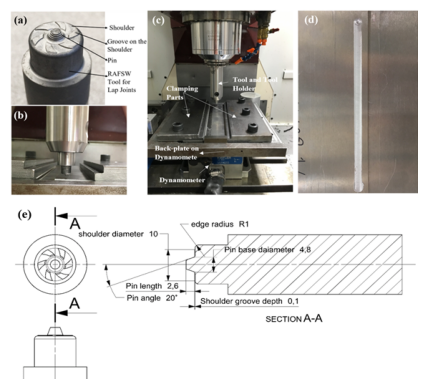

In [7]:
# Load the png image
image1 = mpimg.imread(".\\data\\pic1.png")

# Display the image
plt.imshow(image1)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [22]:
df_fsw = pd.read_csv(".\\data\\paper1.csv")
df_eval = pd.read_csv(".\\data\\paper1_eval.csv")
df_fsw.head()

P.D. (mm)  w (rpm)  V (mm/min)  F (kN)  UTS (MPa)
0       5.75     2500         500     3.4        143
1       5.75     3500         300     3.7        210
2       5.90     2500         300     5.9        208
3       5.90     3500         500     3.5        142
4       6.05     2500         500     5.9        222

In [23]:
# Summary statistics
print(df_fsw.describe())

       P.D. (mm)      w (rpm)  V (mm/min)     F (kN)   UTS (MPa)
count  26.000000    26.000000   26.000000  26.000000   26.000000
mean    6.079615  3455.769231  519.615385   5.269231  213.115385
std     0.134476   456.799064  103.903061   1.080655   40.767955
min     5.750000  2500.000000  300.000000   3.400000  138.000000
25%     6.050000  3500.000000  500.000000   4.200000  208.000000
50%     6.110000  3500.000000  540.000000   5.700000  229.000000
75%     6.150000  3750.000000  590.000000   5.900000  243.500000
max     6.300000  4000.000000  650.000000   7.000000  253.000000


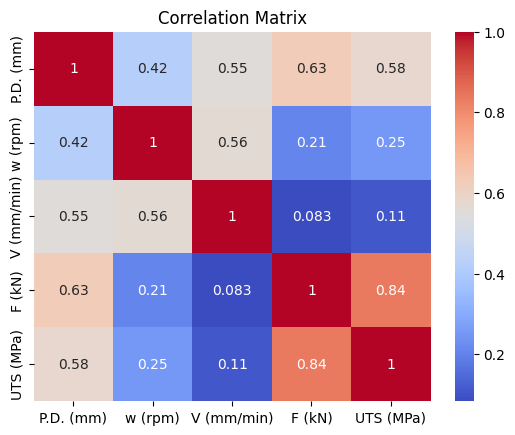

In [24]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

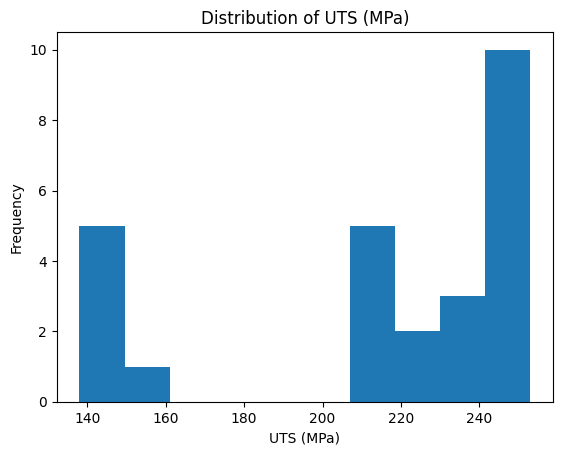

In [3]:
# Data Visualization:

df_fsw['UTS (MPa)'].plot.hist(bins=10)
plt.xlabel('UTS (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of UTS (MPa)')
plt.show()

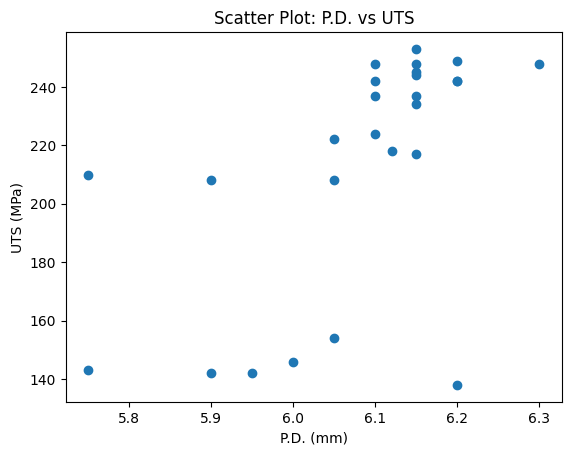

In [4]:
plt.scatter(df_fsw['P.D. (mm)'], df_fsw['UTS (MPa)'])
plt.xlabel('P.D. (mm)')
plt.ylabel('UTS (MPa)')
plt.title('Scatter Plot: P.D. vs UTS')
plt.show()

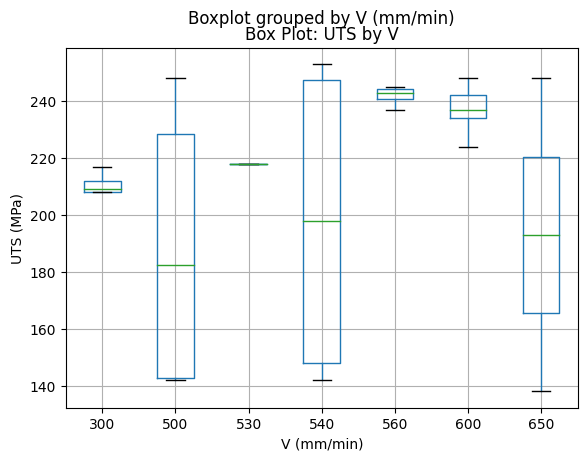

In [5]:
df_fsw.boxplot(column='UTS (MPa)', by='V (mm/min)')
plt.xlabel('V (mm/min)')
plt.ylabel('UTS (MPa)')
plt.title('Box Plot: UTS by V')
plt.show()

In [6]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

            P.D. (mm)   w (rpm)  V (mm/min)    F (kN)  UTS (MPa)
P.D. (mm)    1.000000  0.421665    0.549641  0.629688   0.578304
w (rpm)      0.421665  1.000000    0.564280  0.206191   0.251376
V (mm/min)   0.549641  0.564280    1.000000  0.083251   0.105490
F (kN)       0.629688  0.206191    0.083251  1.000000   0.838015
UTS (MPa)    0.578304  0.251376    0.105490  0.838015   1.000000


To fit a linear regression machine learning model 

In [7]:
X = df_fsw.drop('UTS (MPa)', axis=1)  # Features
y = df_fsw['UTS (MPa)']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 354.5551383027034
Mean Absolute Error (MAE): 15.789148438722085
R-squared: 0.7488245079619552


In [9]:
# Make predictions on the test data using the trained model
pred_UTS = model.predict(df_eval)

# Display the predicted UTS values
print(pred_UTS)

[208.63780979 238.04753037 278.58246464 244.07558631]


In [10]:
real_UTS = [240, 242, 238, 243]

In [11]:
real_UTS = np.array([240, 242, 238, 243])  # Convert real_UTS to a numpy array for comparison

# Calculate evaluation metrics
mse = mean_squared_error(real_UTS, pred_UTS)
mae = mean_absolute_error(real_UTS, pred_UTS)
r2 = r2_score(real_UTS, pred_UTS)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 661.8255783539067
Mean Absolute Error (MAE): 19.243177700410172
R-squared: -178.47812294343234


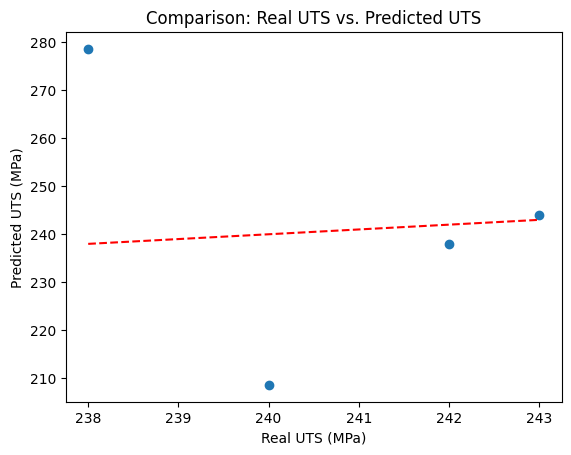

In [12]:
plt.scatter(real_UTS, pred_UTS)
plt.plot([min(real_UTS), max(real_UTS)], [min(real_UTS), max(real_UTS)], color='red', linestyle='--')
plt.xlabel('Real UTS (MPa)')
plt.ylabel('Predicted UTS (MPa)')
plt.title('Comparison: Real UTS vs. Predicted UTS')
plt.show()

## ANN

In [13]:
df_fsw = pd.read_csv(".\\data\\paper1.csv")
df_eval = pd.read_csv(".\\data\\paper1_eval.csv")

In [14]:
# Prepare the data:
X = df_fsw.drop('UTS (MPa)', axis=1)  # Features
y = df_fsw['UTS (MPa)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=3000, batch_size=32, verbose=1)

# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

Epoch 1/3000
1/1 [==============================] - 1s 644ms/step - loss: 46370.2578
Epoch 2/3000
1/1 [==============================] - 0s 4ms/step - loss: 46343.6328
Epoch 3/3000
1/1 [==============================] - 0s 12ms/step - loss: 46316.8984
Epoch 4/3000
1/1 [==============================] - 0s 9ms/step - loss: 46290.0078
Epoch 5/3000
1/1 [==============================] - 0s 3ms/step - loss: 46263.0703
Epoch 6/3000
1/1 [==============================] - 0s 6ms/step - loss: 46236.0820
Epoch 7/3000
1/1 [==============================] - 0s 5ms/step - loss: 46209.2617
Epoch 8/3000
1/1 [==============================] - 0s 3ms/step - loss: 46182.8672
Epoch 9/3000
1/1 [==============================] - 0s 3ms/step - loss: 46156.7734
Epoch 10/3000
1/1 [==============================] - 0s 6ms/step - loss: 46130.7969
Epoch 11/3000
1/1 [==============================] - 0s 4ms/step - loss: 46104.7539
Epoch 12/3000
1/1 [==============================] - 0s 6ms/step - loss: 46078.609

1/1 [==============================] - 0s 4ms/step - loss: 9429.1289
Epoch 195/3000
1/1 [==============================] - 0s 4ms/step - loss: 9185.5215
Epoch 196/3000
1/1 [==============================] - 0s 4ms/step - loss: 8947.1328
Epoch 197/3000
1/1 [==============================] - 0s 4ms/step - loss: 8714.0234
Epoch 198/3000
1/1 [==============================] - 0s 4ms/step - loss: 8486.2012
Epoch 199/3000
1/1 [==============================] - 0s 4ms/step - loss: 8263.7471
Epoch 200/3000
1/1 [==============================] - 0s 5ms/step - loss: 8046.7031
Epoch 201/3000
1/1 [==============================] - 0s 4ms/step - loss: 7835.1001
Epoch 202/3000
1/1 [==============================] - 0s 4ms/step - loss: 7628.9517
Epoch 203/3000
1/1 [==============================] - 0s 4ms/step - loss: 7428.2920
Epoch 204/3000
1/1 [==============================] - 0s 3ms/step - loss: 7233.1289
Epoch 205/3000
1/1 [==============================] - 0s 4ms/step - loss: 7043.4658
Epoch 2

1/1 [==============================] - 0s 5ms/step - loss: 2004.6908
Epoch 389/3000
1/1 [==============================] - 0s 4ms/step - loss: 2000.1897
Epoch 390/3000
1/1 [==============================] - 0s 3ms/step - loss: 1995.6823
Epoch 391/3000
1/1 [==============================] - 0s 4ms/step - loss: 1991.1793
Epoch 392/3000
1/1 [==============================] - 0s 4ms/step - loss: 1986.6824
Epoch 393/3000
1/1 [==============================] - 0s 3ms/step - loss: 1982.2148
Epoch 394/3000
1/1 [==============================] - 0s 5ms/step - loss: 1977.7465
Epoch 395/3000
1/1 [==============================] - 0s 4ms/step - loss: 1973.3496
Epoch 396/3000
1/1 [==============================] - 0s 4ms/step - loss: 1968.9578
Epoch 397/3000
1/1 [==============================] - 0s 5ms/step - loss: 1964.6016
Epoch 398/3000
1/1 [==============================] - 0s 4ms/step - loss: 1960.2395
Epoch 399/3000
1/1 [==============================] - 0s 5ms/step - loss: 1955.9489
Epoch 4

1/1 [==============================] - 0s 4ms/step - loss: 1250.4276
Epoch 583/3000
1/1 [==============================] - 0s 5ms/step - loss: 1247.1018
Epoch 584/3000
1/1 [==============================] - 0s 4ms/step - loss: 1243.7920
Epoch 585/3000
1/1 [==============================] - 0s 7ms/step - loss: 1240.4829
Epoch 586/3000
1/1 [==============================] - 0s 4ms/step - loss: 1237.1726
Epoch 587/3000
1/1 [==============================] - 0s 3ms/step - loss: 1233.8708
Epoch 588/3000
1/1 [==============================] - 0s 5ms/step - loss: 1230.5726
Epoch 589/3000
1/1 [==============================] - 0s 4ms/step - loss: 1227.2875
Epoch 590/3000
1/1 [==============================] - 0s 4ms/step - loss: 1224.0215
Epoch 591/3000
1/1 [==============================] - 0s 4ms/step - loss: 1220.7734
Epoch 592/3000
1/1 [==============================] - 0s 4ms/step - loss: 1217.5377
Epoch 593/3000
1/1 [==============================] - 0s 4ms/step - loss: 1214.3147
Epoch 5

1/1 [==============================] - 0s 4ms/step - loss: 735.2325
Epoch 778/3000
1/1 [==============================] - 0s 4ms/step - loss: 733.2014
Epoch 779/3000
1/1 [==============================] - 0s 4ms/step - loss: 731.1700
Epoch 780/3000
1/1 [==============================] - 0s 8ms/step - loss: 729.1399
Epoch 781/3000
1/1 [==============================] - 0s 4ms/step - loss: 727.1234
Epoch 782/3000
1/1 [==============================] - 0s 4ms/step - loss: 725.1097
Epoch 783/3000
1/1 [==============================] - 0s 4ms/step - loss: 723.0959
Epoch 784/3000
1/1 [==============================] - 0s 5ms/step - loss: 721.0797
Epoch 785/3000
1/1 [==============================] - 0s 4ms/step - loss: 719.0660
Epoch 786/3000
1/1 [==============================] - 0s 4ms/step - loss: 717.0592
Epoch 787/3000
1/1 [==============================] - 0s 5ms/step - loss: 715.0573
Epoch 788/3000
1/1 [==============================] - 0s 3ms/step - loss: 713.0569
Epoch 789/3000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 439.4965
Epoch 974/3000
1/1 [==============================] - 0s 4ms/step - loss: 438.3036
Epoch 975/3000
1/1 [==============================] - 0s 4ms/step - loss: 437.1184
Epoch 976/3000
1/1 [==============================] - 0s 3ms/step - loss: 435.9218
Epoch 977/3000
1/1 [==============================] - 0s 5ms/step - loss: 434.7560
Epoch 978/3000
1/1 [==============================] - 0s 4ms/step - loss: 433.5640
Epoch 979/3000
1/1 [==============================] - 0s 4ms/step - loss: 432.3864
Epoch 980/3000
1/1 [==============================] - 0s 5ms/step - loss: 431.2174
Epoch 981/3000
1/1 [==============================] - 0s 4ms/step - loss: 430.0422
Epoch 982/3000
1/1 [==============================] - 0s 5ms/step - loss: 428.8629
Epoch 983/3000
1/1 [==============================] - 0s 6ms/step - loss: 427.6899
Epoch 984/3000
1/1 [==============================] - 0s 3ms/step - loss: 426.5253
Epoch 985/3000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 344.9622
Epoch 1072/3000
1/1 [==============================] - 0s 4ms/step - loss: 344.1782
Epoch 1073/3000
1/1 [==============================] - 0s 4ms/step - loss: 343.3963
Epoch 1074/3000
1/1 [==============================] - 0s 4ms/step - loss: 342.6113
Epoch 1075/3000
1/1 [==============================] - 0s 5ms/step - loss: 341.8289
Epoch 1076/3000
1/1 [==============================] - 0s 4ms/step - loss: 341.0495
Epoch 1077/3000
1/1 [==============================] - 0s 5ms/step - loss: 340.2818
Epoch 1078/3000
1/1 [==============================] - 0s 5ms/step - loss: 339.5108
Epoch 1079/3000
1/1 [==============================] - 0s 4ms/step - loss: 338.7465
Epoch 1080/3000
1/1 [==============================] - 0s 4ms/step - loss: 337.9758
Epoch 1081/3000
1/1 [==============================] - 0s 3ms/step - loss: 337.2235
Epoch 1082/3000
1/1 [==============================] - 0s 4ms/step - loss: 336.4727
Epoch 10

1/1 [==============================] - 0s 4ms/step - loss: 220.5683
Epoch 1266/3000
1/1 [==============================] - 0s 4ms/step - loss: 220.0449
Epoch 1267/3000
1/1 [==============================] - 0s 5ms/step - loss: 219.5279
Epoch 1268/3000
1/1 [==============================] - 0s 5ms/step - loss: 219.0175
Epoch 1269/3000
1/1 [==============================] - 0s 3ms/step - loss: 218.5016
Epoch 1270/3000
1/1 [==============================] - 0s 5ms/step - loss: 217.9896
Epoch 1271/3000
1/1 [==============================] - 0s 4ms/step - loss: 217.4868
Epoch 1272/3000
1/1 [==============================] - 0s 5ms/step - loss: 217.0122
Epoch 1273/3000
1/1 [==============================] - 0s 4ms/step - loss: 216.5349
Epoch 1274/3000
1/1 [==============================] - 0s 4ms/step - loss: 216.0510
Epoch 1275/3000
1/1 [==============================] - 0s 6ms/step - loss: 215.5616
Epoch 1276/3000
1/1 [==============================] - 0s 4ms/step - loss: 215.0790
Epoch 12

1/1 [==============================] - 0s 4ms/step - loss: 139.6584
Epoch 1460/3000
1/1 [==============================] - 0s 3ms/step - loss: 139.3048
Epoch 1461/3000
1/1 [==============================] - 0s 5ms/step - loss: 138.9559
Epoch 1462/3000
1/1 [==============================] - 0s 3ms/step - loss: 138.5987
Epoch 1463/3000
1/1 [==============================] - 0s 4ms/step - loss: 138.2523
Epoch 1464/3000
1/1 [==============================] - 0s 5ms/step - loss: 137.9214
Epoch 1465/3000
1/1 [==============================] - 0s 4ms/step - loss: 137.5775
Epoch 1466/3000
1/1 [==============================] - 0s 6ms/step - loss: 137.2387
Epoch 1467/3000
1/1 [==============================] - 0s 4ms/step - loss: 136.9056
Epoch 1468/3000
1/1 [==============================] - 0s 4ms/step - loss: 136.5711
Epoch 1469/3000
1/1 [==============================] - 0s 4ms/step - loss: 136.2337
Epoch 1470/3000
1/1 [==============================] - 0s 4ms/step - loss: 135.9007
Epoch 14

1/1 [==============================] - 0s 4ms/step - loss: 85.0444
Epoch 1655/3000
1/1 [==============================] - 0s 4ms/step - loss: 84.8256
Epoch 1656/3000
1/1 [==============================] - 0s 4ms/step - loss: 84.5976
Epoch 1657/3000
1/1 [==============================] - 0s 4ms/step - loss: 84.3669
Epoch 1658/3000
1/1 [==============================] - 0s 3ms/step - loss: 84.1415
Epoch 1659/3000
1/1 [==============================] - 0s 5ms/step - loss: 83.9137
Epoch 1660/3000
1/1 [==============================] - 0s 4ms/step - loss: 83.6948
Epoch 1661/3000
1/1 [==============================] - 0s 5ms/step - loss: 83.4689
Epoch 1662/3000
1/1 [==============================] - 0s 3ms/step - loss: 83.2398
Epoch 1663/3000
1/1 [==============================] - 0s 4ms/step - loss: 83.0209
Epoch 1664/3000
1/1 [==============================] - 0s 6ms/step - loss: 82.7999
Epoch 1665/3000
1/1 [==============================] - 0s 4ms/step - loss: 82.5731
Epoch 1666/3000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 49.0166
Epoch 1851/3000
1/1 [==============================] - 0s 4ms/step - loss: 48.8708
Epoch 1852/3000
1/1 [==============================] - 0s 6ms/step - loss: 48.7291
Epoch 1853/3000
1/1 [==============================] - 0s 3ms/step - loss: 48.5818
Epoch 1854/3000
1/1 [==============================] - 0s 3ms/step - loss: 48.4336
Epoch 1855/3000
1/1 [==============================] - 0s 5ms/step - loss: 48.2903
Epoch 1856/3000
1/1 [==============================] - 0s 4ms/step - loss: 48.1519
Epoch 1857/3000
1/1 [==============================] - 0s 5ms/step - loss: 48.0081
Epoch 1858/3000
1/1 [==============================] - 0s 4ms/step - loss: 47.8598
Epoch 1859/3000
1/1 [==============================] - 0s 4ms/step - loss: 47.7170
Epoch 1860/3000
1/1 [==============================] - 0s 4ms/step - loss: 47.5694
Epoch 1861/3000
1/1 [==============================] - 0s 4ms/step - loss: 47.4234
Epoch 1862/3000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 26.9336
Epoch 2047/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.8495
Epoch 2048/3000
1/1 [==============================] - 0s 3ms/step - loss: 26.7646
Epoch 2049/3000
1/1 [==============================] - 0s 5ms/step - loss: 26.6830
Epoch 2050/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.6014
Epoch 2051/3000
1/1 [==============================] - 0s 5ms/step - loss: 26.5205
Epoch 2052/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.4385
Epoch 2053/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.3578
Epoch 2054/3000
1/1 [==============================] - 0s 6ms/step - loss: 26.2759
Epoch 2055/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.1949
Epoch 2056/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.1193
Epoch 2057/3000
1/1 [==============================] - 0s 4ms/step - loss: 26.0383
Epoch 2058/3000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 14.4903
Epoch 2243/3000
1/1 [==============================] - 0s 3ms/step - loss: 14.4425
Epoch 2244/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.3947
Epoch 2245/3000
1/1 [==============================] - 0s 3ms/step - loss: 14.3459
Epoch 2246/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.2978
Epoch 2247/3000
1/1 [==============================] - 0s 5ms/step - loss: 14.2509
Epoch 2248/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.2035
Epoch 2249/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.1565
Epoch 2250/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.1106
Epoch 2251/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.0610
Epoch 2252/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.0148
Epoch 2253/3000
1/1 [==============================] - 0s 5ms/step - loss: 13.9680
Epoch 2254/3000
1/1 

Epoch 2440/3000
1/1 [==============================] - 0s 4ms/step - loss: 7.0985
Epoch 2441/3000
1/1 [==============================] - 0s 4ms/step - loss: 7.0714
Epoch 2442/3000
1/1 [==============================] - 0s 5ms/step - loss: 7.0441
Epoch 2443/3000
1/1 [==============================] - 0s 6ms/step - loss: 7.0165
Epoch 2444/3000
1/1 [==============================] - 0s 4ms/step - loss: 6.9899
Epoch 2445/3000
1/1 [==============================] - 0s 4ms/step - loss: 6.9625
Epoch 2446/3000
1/1 [==============================] - 0s 4ms/step - loss: 6.9357
Epoch 2447/3000
1/1 [==============================] - 0s 3ms/step - loss: 6.9089
Epoch 2448/3000
1/1 [==============================] - 0s 5ms/step - loss: 6.8822
Epoch 2449/3000
1/1 [==============================] - 0s 3ms/step - loss: 6.8555
Epoch 2450/3000
1/1 [==============================] - 0s 4ms/step - loss: 6.8281
Epoch 2451/3000
1/1 [==============================] - 0s 3ms/step - loss: 6.8025
Epoch 2452/3000


1/1 [==============================] - 0s 6ms/step - loss: 3.1792
Epoch 2640/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.1658
Epoch 2641/3000
1/1 [==============================] - 0s 3ms/step - loss: 3.1530
Epoch 2642/3000
1/1 [==============================] - 0s 3ms/step - loss: 3.1398
Epoch 2643/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.1267
Epoch 2644/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.1137
Epoch 2645/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.1006
Epoch 2646/3000
1/1 [==============================] - 0s 6ms/step - loss: 3.0876
Epoch 2647/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.0744
Epoch 2648/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.0618
Epoch 2649/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.0494
Epoch 2650/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.0368
Epoch 2651/3000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 2.0974
Epoch 2740/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.0888
Epoch 2741/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.0800
Epoch 2742/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.0714
Epoch 2743/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.0625
Epoch 2744/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.0541
Epoch 2745/3000
1/1 [==============================] - 0s 3ms/step - loss: 2.0459
Epoch 2746/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.0375
Epoch 2747/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.0288
Epoch 2748/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.0205
Epoch 2749/3000
1/1 [==============================] - 0s 3ms/step - loss: 2.0122
Epoch 2750/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.0038
Epoch 2751/3000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 1.3853
Epoch 2840/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3796
Epoch 2841/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3738
Epoch 2842/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3682
Epoch 2843/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3626
Epoch 2844/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3568
Epoch 2845/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3513
Epoch 2846/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3457
Epoch 2847/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.3401
Epoch 2848/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3344
Epoch 2849/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.3290
Epoch 2850/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.3235
Epoch 2851/3000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.9131
Epoch 2940/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.9093
Epoch 2941/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.9055
Epoch 2942/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.9017
Epoch 2943/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.8980
Epoch 2944/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.8942
Epoch 2945/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.8904
Epoch 2946/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.8866
Epoch 2947/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.8830
Epoch 2948/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.8793
Epoch 2949/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.8755
Epoch 2950/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.8718
Epoch 2951/3000
1/1 [===========

In [17]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_UTS = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_UTS)

C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
[[248.71933]
 [237.05435]
 [286.60107]
 [244.82881]]


In [18]:
real_UTS = np.array([240, 242, 238, 243])  # Convert real_UTS to a numpy array for comparison

# Calculate evaluation metrics
mse = mean_squared_error(real_UTS, pred_UTS)
mae = mean_absolute_error(real_UTS, pred_UTS)
r2 = r2_score(real_UTS, pred_UTS)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
# print("R-squared:", r2)

Mean Squared Error (MSE): 616.4737790143699
Mean Absolute Error (MAE): 16.02371597290039


number of epochs = 200
Mean Squared Error (MSE): 6874.515670093024
Mean Absolute Error (MAE): 69.9925594329834
    
number of epochs = 1000
Mean Squared Error (MSE): 1680.7118532120367
Mean Absolute Error (MAE): 33.3286247253418
    
number of epochs = 2000
Mean Squared Error (MSE): 1680.7118532120367
Mean Absolute Error (MAE): 33.3286247253418

number of epochs = 3000
Mean Squared Error (MSE): 616.4737790143699
Mean Absolute Error (MAE): 16.02371597290039
    
number of epochs = 4000
Mean Squared Error (MSE): 648.8221595811774
Mean Absolute Error (MAE): 16.045650482177734


In [28]:
data = {
    'Number of Epochs': [200, 1000, 2000, 3000, 4000],
    'Mean Squared Error (MSE)': [6874.515670093024, 1680.7118532120367, 1680.7118532120367, 616.4737790143699, 648.8221595811774],
    'Mean Absolute Error (MAE)': [69.9925594329834, 33.3286247253418, 33.3286247253418, 16.02371597290039, 16.045650482177734]
}

df_epochs = pd.DataFrame(data)

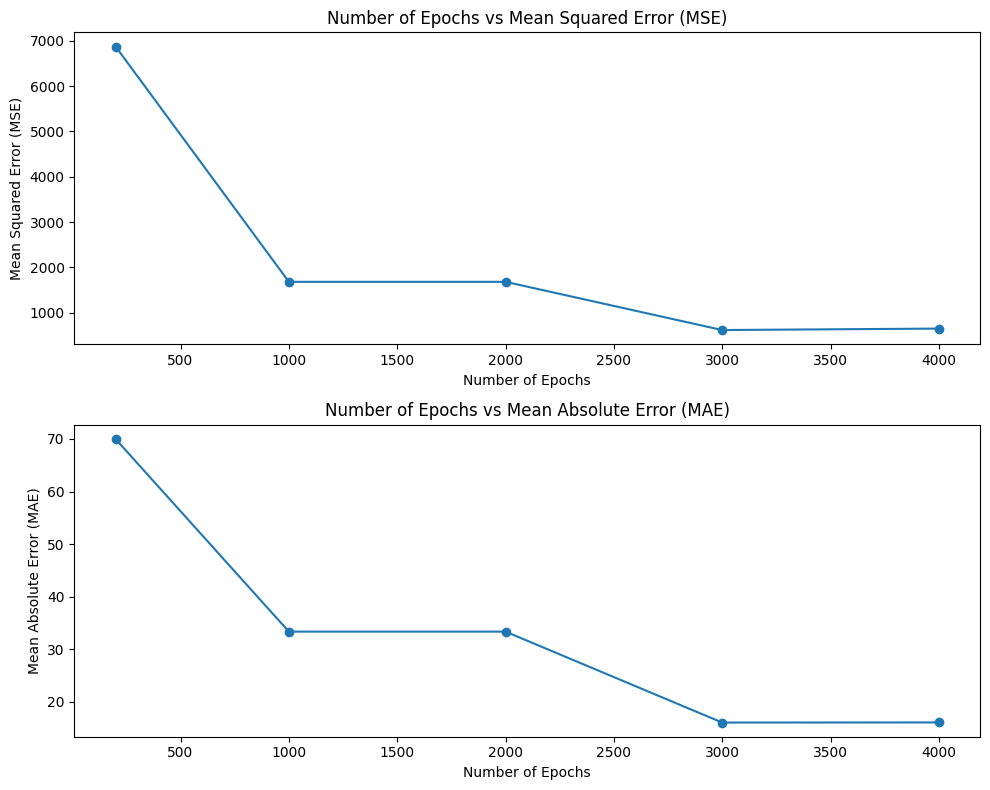

In [30]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of epochs vs MSE
ax1.plot(df_epochs['Number of Epochs'], df_epochs['Mean Squared Error (MSE)'], marker='o')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('Number of Epochs vs Mean Squared Error (MSE)')

# Plot the number of epochs vs MAE
ax2.plot(df_epochs['Number of Epochs'], df_epochs['Mean Absolute Error (MAE)'], marker='o')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.set_title('Number of Epochs vs Mean Absolute Error (MAE)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

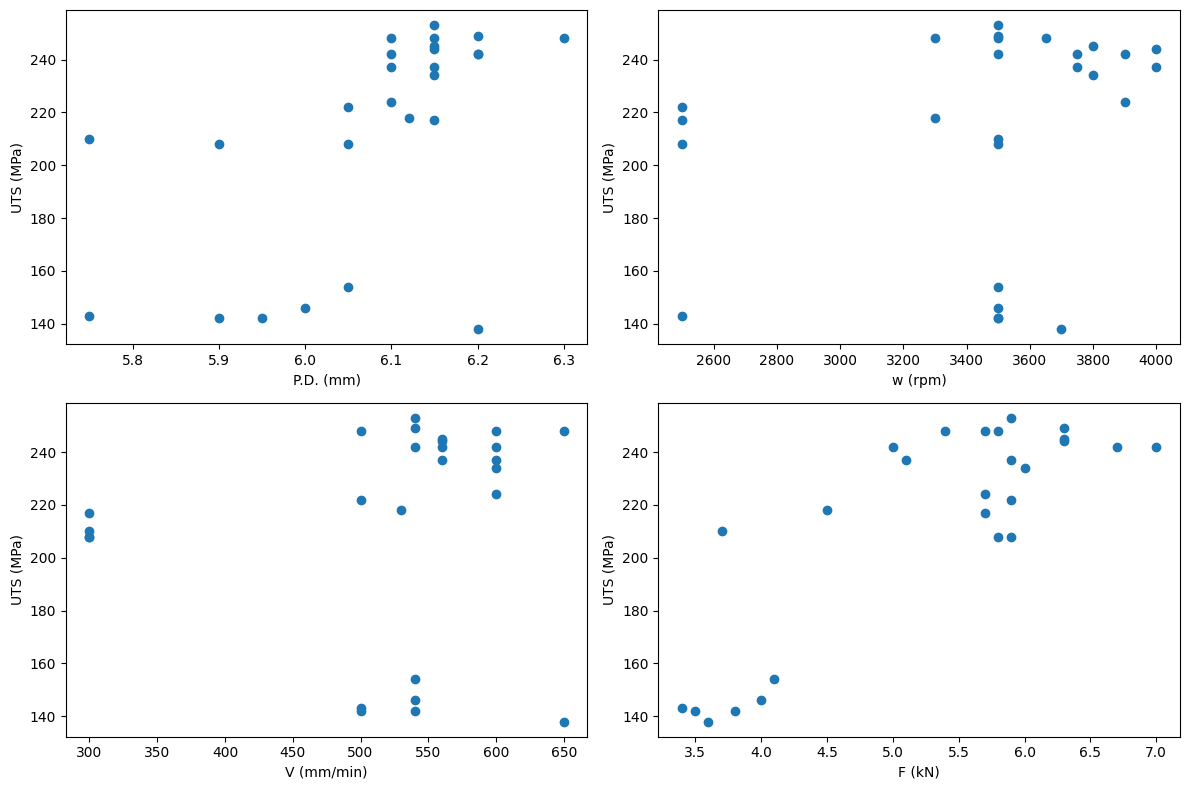

In [33]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Create scatter plots for each input parameter
axs[0, 0].scatter(df_fsw['P.D. (mm)'], df_fsw['UTS (MPa)'])
axs[0, 0].set_xlabel('P.D. (mm)')
axs[0, 0].set_ylabel('UTS (MPa)')

axs[0, 1].scatter(df_fsw['w (rpm)'], df_fsw['UTS (MPa)'])
axs[0, 1].set_xlabel('w (rpm)')
axs[0, 1].set_ylabel('UTS (MPa)')

axs[1, 0].scatter(df_fsw['V (mm/min)'], df_fsw['UTS (MPa)'])
axs[1, 0].set_xlabel('V (mm/min)')
axs[1, 0].set_ylabel('UTS (MPa)')

axs[1, 1].scatter(df_fsw['F (kN)'], df_fsw['UTS (MPa)'])
axs[1, 1].set_xlabel('F (kN)')
axs[1, 1].set_ylabel('UTS (MPa)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

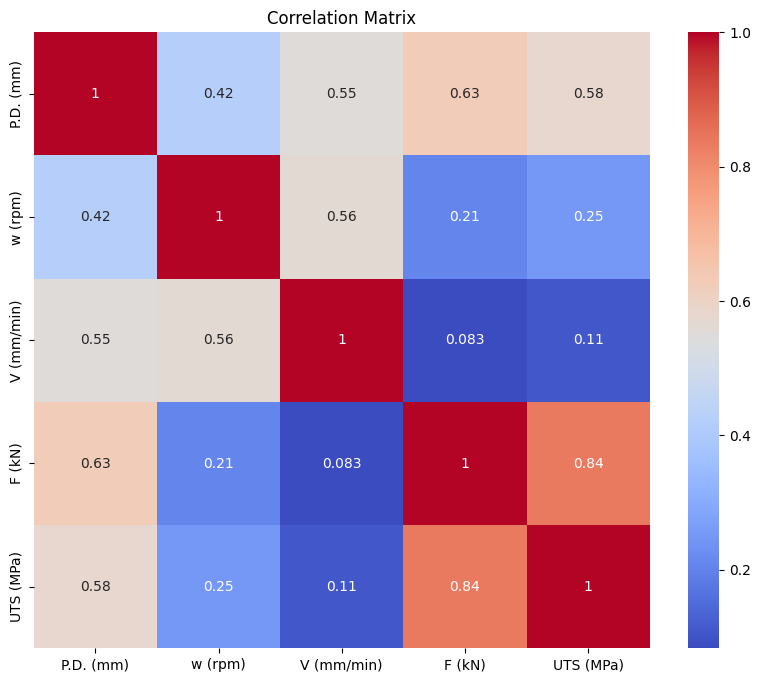

In [36]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

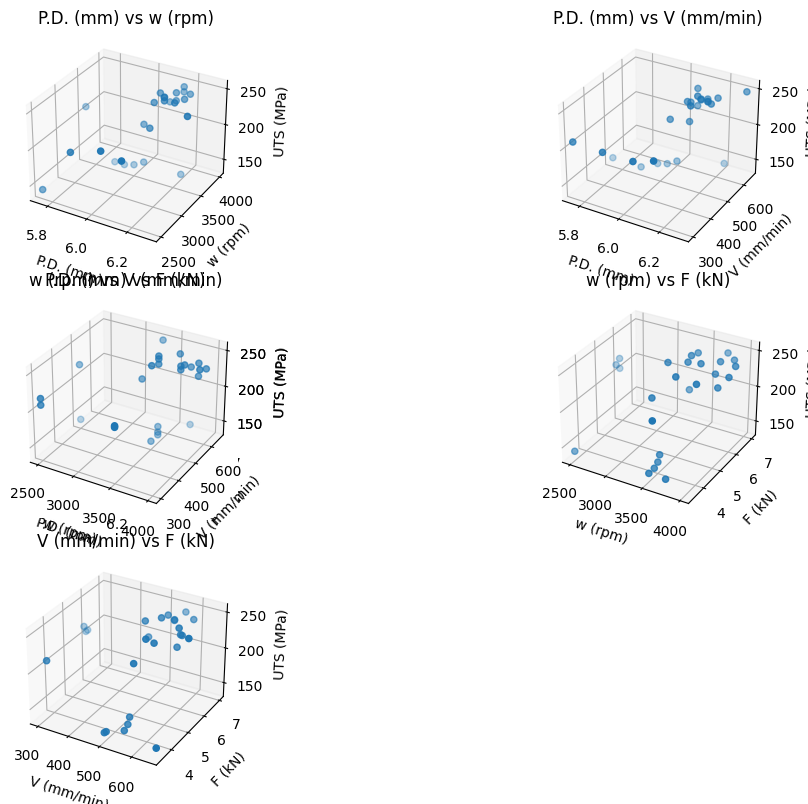

In [37]:
# Create a 3D scatter plot for each pair of input parameters
fig = plt.figure(figsize=(12, 8))

# Loop through each pair of input parameters
for i, param1 in enumerate(df_fsw.columns[:-1]):
    for j, param2 in enumerate(df_fsw.columns[i+1:-1]):
        # Create a subplot for the pair of input parameters
        ax = fig.add_subplot(3, 2, (i*2)+(j+1), projection='3d')
        
        # Scatter plot the input parameters against the target parameter
        ax.scatter(df_fsw[param1], df_fsw[param2], df_fsw['UTS (MPa)'])
        
        # Set labels for the axes
        ax.set_xlabel(param1)
        ax.set_ylabel(param2)
        ax.set_zlabel('UTS (MPa)')
        
        # Set a title for the subplot
        ax.set_title(f'{param1} vs {param2}')
        
# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


In [ ]:
numE = 

To optimize by hyper parameter uning

In [ ]:
# Define a function to create the neural network model
def create_model(hidden_units=64, activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(hidden_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(hidden_units, activation=activation),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Score (MSE):", -grid_result.best_score_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
pred_UTS = best_model.predict(X_test_scaled)

# Evaluate the best model on the test data
mse = mean_squared_error(y_test, pred_UTS)
print("Mean Squared Error (MSE):", mse)

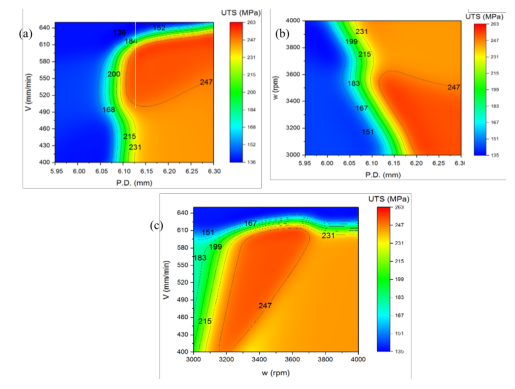

In [9]:
# Load the JPEG image
image2 = mpimg.imread(".\\data\\pic2.png")

# Display the image
plt.imshow(image2)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Paper3

In [25]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")
df_fsw.head()

PL (mm)  SD (mm)  SGD (mm)  PBD (mm)  PA (ø)  PLD (mm)  V (mm/min)  \
0      1.8      8.5      0.10       4.0      20      0.25        1400   
1      1.8      8.5      0.10       4.0      20      0.25        1400   
2      1.8      9.5      0.10       4.0      20      0.45        2000   
3      1.8      9.5      0.10       4.0      20      0.45        2000   
4      1.8     10.5      0.25       4.8      24      0.25        1400   

   w (rpm)  PD (mm)  C  DAF (kN)  FF (kN)  
0     3500     1.80  1      2600     2994  
1     3500     1.85  1      3060     4453  
2     5000     1.80  2      2500     3390  
3     5000     1.85  2      3120     3937  
4     3500     1.80  2      2900     5373

In [26]:
# Summary statistics
print(df_fsw.describe())

         PL (mm)    SD (mm)  SGD (mm)   PBD (mm)     PA (ø)   PLD (mm)  \
count  36.000000  36.000000  36.00000  36.000000  36.000000  36.000000   
mean    2.258333  10.250000   0.18750   4.430556  22.500000   0.363889   
std     0.482034   1.284523   0.08567   0.420081   2.171241   0.101144   
min     1.750000   8.500000   0.10000   3.500000  20.000000   0.250000   
25%     1.800000   9.250000   0.10000   4.000000  20.000000   0.250000   
50%     2.200000  10.500000   0.25000   4.500000  24.000000   0.450000   
75%     2.600000  11.500000   0.25000   4.800000  24.000000   0.450000   
max     3.000000  12.000000   0.30000   5.000000  25.000000   0.500000   

        V (mm/min)      w (rpm)    PD (mm)          C     DAF (kN)  \
count    36.000000    36.000000  36.000000  36.000000    36.000000   
mean   1780.555556  4395.833333   2.291667   1.500000  3615.388889   
std     332.797188   754.451078   0.483218   0.507093   655.552778   
min    1400.000000  3500.000000   1.750000   1.000000

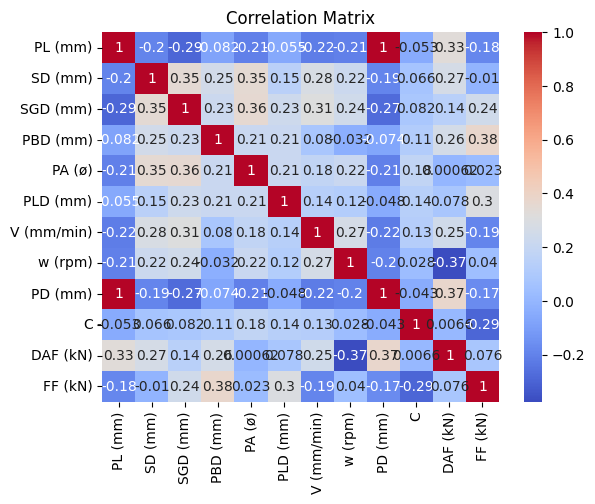

In [27]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

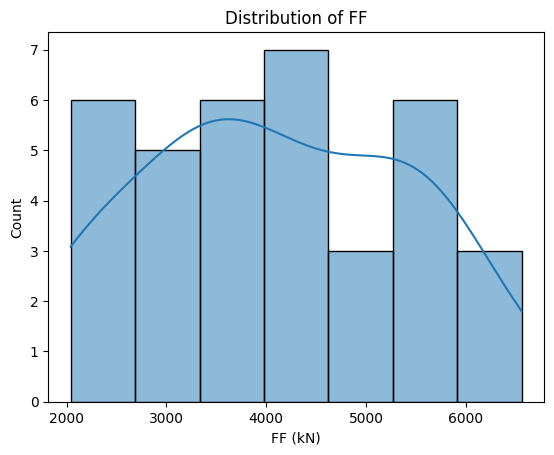

In [28]:
# Distribution of target feature (FF)
sns.histplot(df_fsw['FF (kN)'], kde=True)
plt.xlabel('FF (kN)')
plt.ylabel('Count')
plt.title('Distribution of FF')
plt.show()

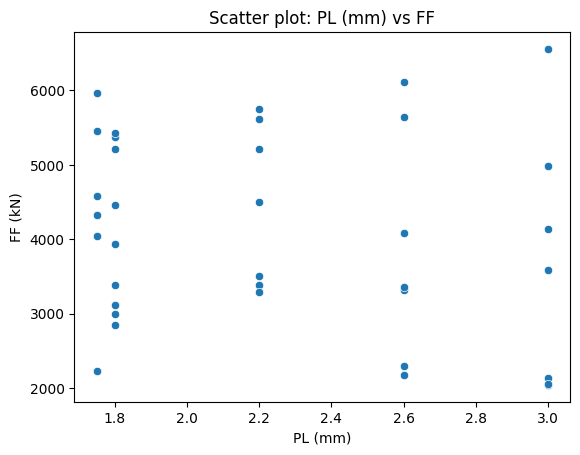

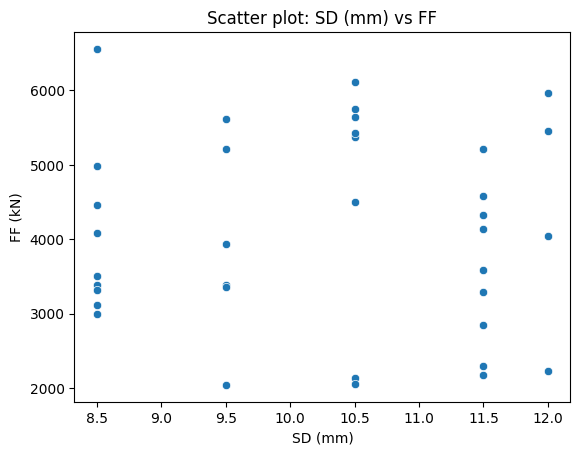

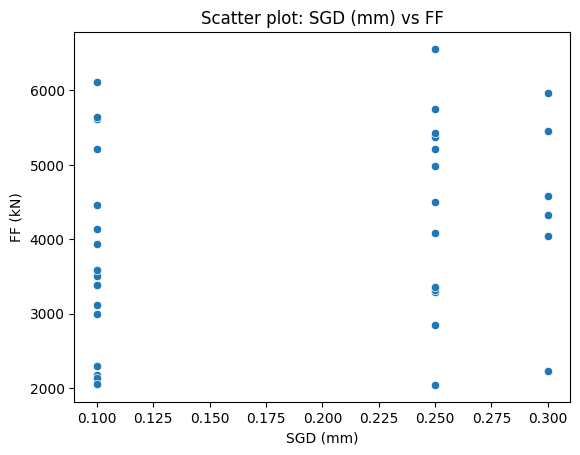

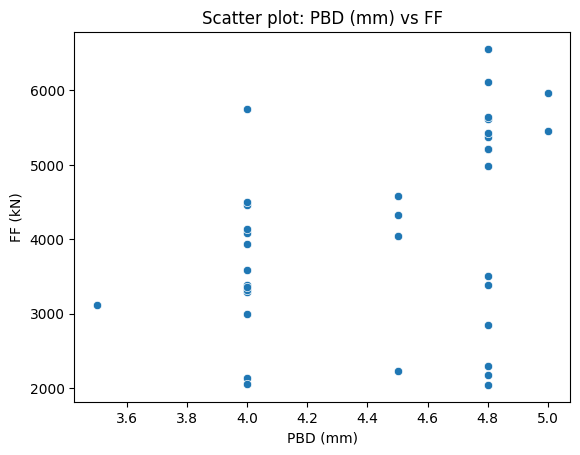

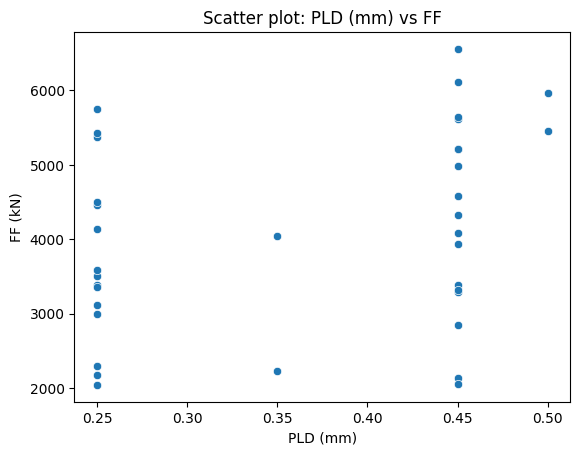

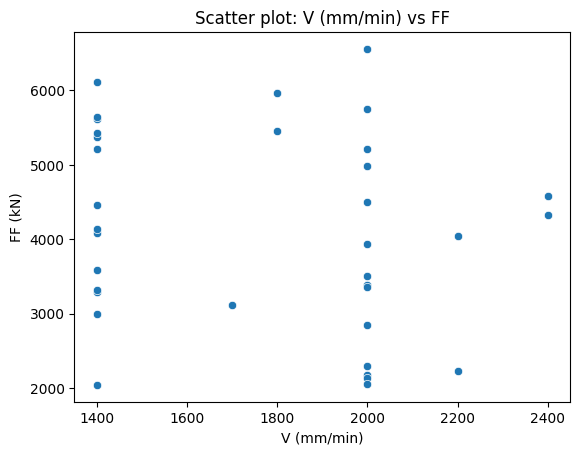

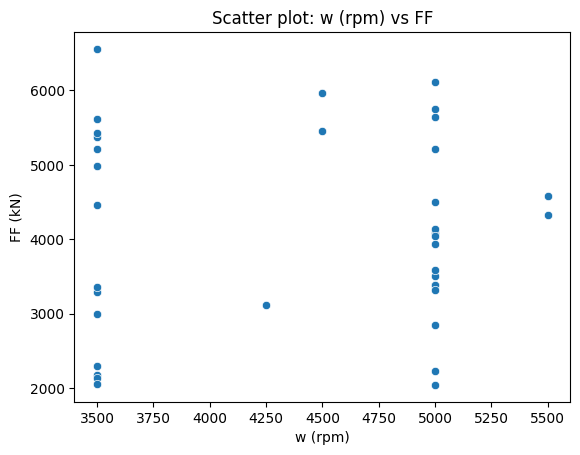

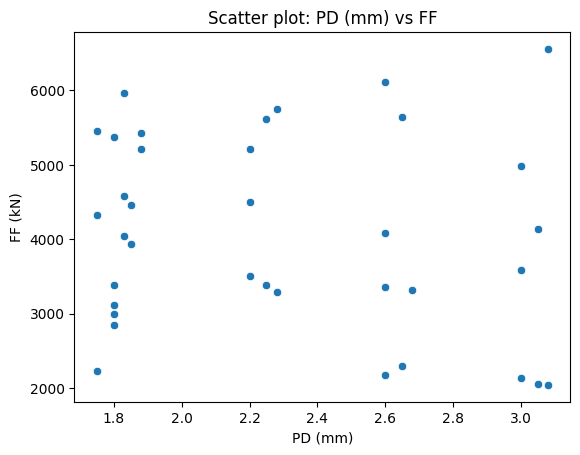

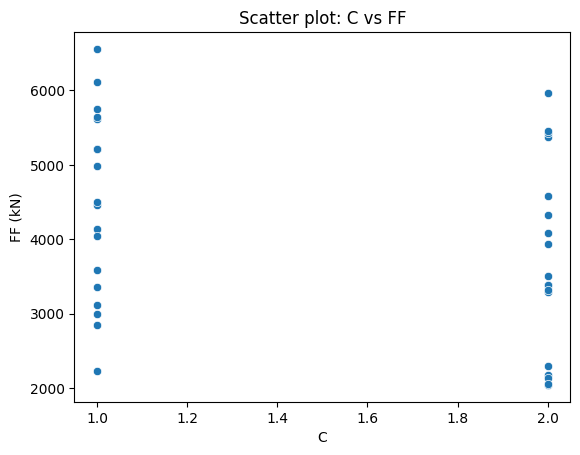

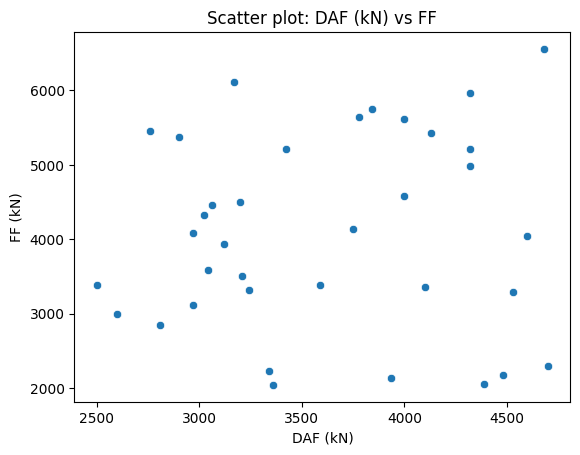

In [29]:
# Scatter plots of target feature against other numerical features
numerical_columns = ['PL (mm)', 'SD (mm)', 'SGD (mm)', 'PBD (mm)', 'PLD (mm)',
                     'V (mm/min)', 'w (rpm)', 'PD (mm)', 'C', 'DAF (kN)']

for column in numerical_columns:
    sns.scatterplot(data=df_fsw, x=column, y='FF (kN)')
    plt.xlabel(column)
    plt.ylabel('FF (kN)')
    plt.title(f'Scatter plot: {column} vs FF')
    plt.show()

In [30]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

             PL (mm)   SD (mm)  SGD (mm)  PBD (mm)    PA (ø)  PLD (mm)  \
PL (mm)     1.000000 -0.197264 -0.293182 -0.082425 -0.206107 -0.055184   
SD (mm)    -0.197264  1.000000  0.347262  0.252831  0.353428  0.148441   
SGD (mm)   -0.293182  0.347262  1.000000  0.225272  0.357125  0.234936   
PBD (mm)   -0.082425  0.252831  0.225272  1.000000  0.214576  0.211634   
PA (ø)     -0.206107  0.353428  0.357125  0.214576  1.000000  0.214668   
PLD (mm)   -0.055184  0.148441  0.234936  0.211634  0.214668  1.000000   
V (mm/min) -0.217139  0.282382  0.311914  0.079988  0.179910  0.135574   
w (rpm)    -0.206721  0.222959  0.244510 -0.032492  0.215843  0.122467   
PD (mm)     0.997304 -0.188495 -0.273828 -0.073871 -0.206691 -0.048423   
C          -0.052599  0.065795  0.082211  0.114007  0.181650  0.139266   
DAF (kN)    0.332812  0.269352  0.142206  0.262746  0.000622  0.078298   
FF (kN)    -0.183974 -0.010210  0.244638  0.375386  0.022739  0.299554   

            V (mm/min)   w (rpm)   PD

### To fit a linear regression machine learning model 

In [32]:
X = df_fsw.drop('FF (kN)', axis=1)  # Features
y = df_fsw['FF (kN)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 2249036.4025538033
Mean Absolute Error (MAE): 1340.6984064360172
R-squared: -0.10311569703066614


In [34]:
# Make predictions on the test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[3356.62676862 3609.02895049 3423.21213933 3397.95601517]


In [35]:
real_FF = [2709, 4746, 2123, 3982]

In [36]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 935945.6455824057
Mean Absolute Error (MAE): 917.213485571705
R-squared: 0.1208166306981453


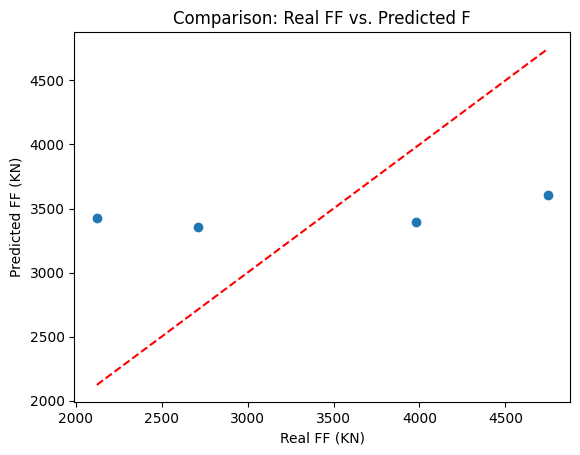

In [37]:
plt.scatter(real_FF, pred_FF)
plt.plot([min(real_FF), max(real_FF)], [min(real_FF), max(real_FF)], color='red', linestyle='--')
plt.xlabel('Real FF (KN)')
plt.ylabel('Predicted FF (KN)')
plt.title('Comparison: Real FF vs. Predicted F')
plt.show()

### MLPRegressor

In [38]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")

In [39]:
# Step 1: Split the data into input features (X) and target variable (y)
X = df_fsw.drop("FF (kN)", axis=1)  # Input features (all columns except the target variable)
y = df_fsw["FF (kN)"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 3: Create and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2559306.0963677973


In [40]:
# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[3734.52289773 4542.69773659 4448.29375821 4216.70780615]


In [41]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 1638776.960076393
Mean Absolute Error (MAE): 947.206681373755
R-squared: -0.5393900875490101


### ANN TensorFlow

In [1]:
df_fsw = pd.read_csv(".\\data\\paper3.csv")
df_eval = pd.read_csv(".\\data\\paper3_eval.csv")

In [2]:
X = df_fsw.drop('FF (kN)', axis=1)  # Features
y = df_fsw['FF (kN)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [3]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=8000, batch_size=32, verbose=1)


# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

Epoch 1/8000
1/1 [==============================] - 1s 604ms/step - loss: 16537669.0000
Epoch 2/8000
1/1 [==============================] - 0s 6ms/step - loss: 16536906.0000
Epoch 3/8000
1/1 [==============================] - 0s 5ms/step - loss: 16536153.0000
Epoch 4/8000
1/1 [==============================] - 0s 4ms/step - loss: 16535409.0000
Epoch 5/8000
1/1 [==============================] - 0s 5ms/step - loss: 16534675.0000
Epoch 6/8000
1/1 [==============================] - 0s 4ms/step - loss: 16533944.0000
Epoch 7/8000
1/1 [==============================] - 0s 4ms/step - loss: 16533203.0000
Epoch 8/8000
1/1 [==============================] - 0s 4ms/step - loss: 16532471.0000
Epoch 9/8000
1/1 [==============================] - 0s 4ms/step - loss: 16531750.0000
Epoch 10/8000
1/1 [==============================] - 0s 3ms/step - loss: 16531031.0000
Epoch 11/8000
1/1 [==============================] - 0s 6ms/step - loss: 16530317.0000
Epoch 12/8000
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 14879545.0000
Epoch 189/8000
1/1 [==============================] - 0s 4ms/step - loss: 14852672.0000
Epoch 190/8000
1/1 [==============================] - 0s 3ms/step - loss: 14825522.0000
Epoch 191/8000
1/1 [==============================] - 0s 6ms/step - loss: 14798099.0000
Epoch 192/8000
1/1 [==============================] - 0s 3ms/step - loss: 14770398.0000
Epoch 193/8000
1/1 [==============================] - 0s 3ms/step - loss: 14742419.0000
Epoch 194/8000
1/1 [==============================] - 0s 3ms/step - loss: 14714158.0000
Epoch 195/8000
1/1 [==============================] - 0s 3ms/step - loss: 14685618.0000
Epoch 196/8000
1/1 [==============================] - 0s 4ms/step - loss: 14656799.0000
Epoch 197/8000
1/1 [==============================] - 0s 4ms/step - loss: 14627697.0000
Epoch 198/8000
1/1 [==============================] - 0s 4ms/step - loss: 14598315.0000
Epoch 199/8000
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 6330643.5000
Epoch 376/8000
1/1 [==============================] - 0s 4ms/step - loss: 6281442.5000
Epoch 377/8000
1/1 [==============================] - 0s 4ms/step - loss: 6232421.0000
Epoch 378/8000
1/1 [==============================] - 0s 5ms/step - loss: 6183580.5000
Epoch 379/8000
1/1 [==============================] - 0s 3ms/step - loss: 6134903.0000
Epoch 380/8000
1/1 [==============================] - 0s 4ms/step - loss: 6086401.0000
Epoch 381/8000
1/1 [==============================] - 0s 4ms/step - loss: 6038085.0000
Epoch 382/8000
1/1 [==============================] - 0s 3ms/step - loss: 5989959.5000
Epoch 383/8000
1/1 [==============================] - 0s 4ms/step - loss: 5942025.5000
Epoch 384/8000
1/1 [==============================] - 0s 4ms/step - loss: 5894288.0000
Epoch 385/8000
1/1 [==============================] - 0s 4ms/step - loss: 5846751.0000
Epoch 386/8000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 1174944.3750
Epoch 564/8000
1/1 [==============================] - 0s 5ms/step - loss: 1166458.0000
Epoch 565/8000
1/1 [==============================] - 0s 3ms/step - loss: 1158083.8750
Epoch 566/8000
1/1 [==============================] - 0s 3ms/step - loss: 1149821.1250
Epoch 567/8000
1/1 [==============================] - 0s 4ms/step - loss: 1141666.7500
Epoch 568/8000
1/1 [==============================] - 0s 4ms/step - loss: 1133623.3750
Epoch 569/8000
1/1 [==============================] - 0s 5ms/step - loss: 1125685.8750
Epoch 570/8000
1/1 [==============================] - 0s 4ms/step - loss: 1117854.0000
Epoch 571/8000
1/1 [==============================] - 0s 5ms/step - loss: 1110125.1250
Epoch 572/8000
1/1 [==============================] - 0s 4ms/step - loss: 1102497.2500
Epoch 573/8000
1/1 [==============================] - 0s 4ms/step - loss: 1094969.3750
Epoch 574/8000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 700062.3750
Epoch 659/8000
1/1 [==============================] - 0s 4ms/step - loss: 697192.5625
Epoch 660/8000
1/1 [==============================] - 0s 5ms/step - loss: 694346.3125
Epoch 661/8000
1/1 [==============================] - 0s 5ms/step - loss: 691523.3750
Epoch 662/8000
1/1 [==============================] - 0s 3ms/step - loss: 688723.5625
Epoch 663/8000
1/1 [==============================] - 0s 4ms/step - loss: 685946.8750
Epoch 664/8000
1/1 [==============================] - 0s 5ms/step - loss: 683188.0000
Epoch 665/8000
1/1 [==============================] - 0s 5ms/step - loss: 680449.0625
Epoch 666/8000
1/1 [==============================] - 0s 3ms/step - loss: 677730.5000
Epoch 667/8000
1/1 [==============================] - 0s 5ms/step - loss: 675031.8125
Epoch 668/8000
1/1 [==============================] - 0s 5ms/step - loss: 672354.1250
Epoch 669/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 377943.9375
Epoch 849/8000
1/1 [==============================] - 0s 4ms/step - loss: 376872.5938
Epoch 850/8000
1/1 [==============================] - 0s 3ms/step - loss: 375803.9688
Epoch 851/8000
1/1 [==============================] - 0s 4ms/step - loss: 374739.8438
Epoch 852/8000
1/1 [==============================] - 0s 5ms/step - loss: 373678.7188
Epoch 853/8000
1/1 [==============================] - 0s 3ms/step - loss: 372618.7500
Epoch 854/8000
1/1 [==============================] - 0s 3ms/step - loss: 371562.9062
Epoch 855/8000
1/1 [==============================] - 0s 5ms/step - loss: 370513.0938
Epoch 856/8000
1/1 [==============================] - 0s 4ms/step - loss: 369466.0938
Epoch 857/8000
1/1 [==============================] - 0s 3ms/step - loss: 368419.1562
Epoch 858/8000
1/1 [==============================] - 0s 5ms/step - loss: 367372.5625
Epoch 859/8000
1/1 [==============================] - 0s 5ms/step - l

Epoch 1038/8000
1/1 [==============================] - 0s 4ms/step - loss: 233889.6406
Epoch 1039/8000
1/1 [==============================] - 0s 4ms/step - loss: 233376.6562
Epoch 1040/8000
1/1 [==============================] - 0s 3ms/step - loss: 232863.7344
Epoch 1041/8000
1/1 [==============================] - 0s 5ms/step - loss: 232352.6250
Epoch 1042/8000
1/1 [==============================] - 0s 4ms/step - loss: 231843.1406
Epoch 1043/8000
1/1 [==============================] - 0s 5ms/step - loss: 231336.6719
Epoch 1044/8000
1/1 [==============================] - 0s 4ms/step - loss: 230830.5000
Epoch 1045/8000
1/1 [==============================] - 0s 4ms/step - loss: 230327.7969
Epoch 1046/8000
1/1 [==============================] - 0s 5ms/step - loss: 229827.7812
Epoch 1047/8000
1/1 [==============================] - 0s 4ms/step - loss: 229330.8594
Epoch 1048/8000
1/1 [==============================] - 0s 4ms/step - loss: 228836.3750
Epoch 1049/8000
1/1 [======================

1/1 [==============================] - 0s 4ms/step - loss: 192897.7969
Epoch 1133/8000
1/1 [==============================] - 0s 3ms/step - loss: 192535.2188
Epoch 1134/8000
1/1 [==============================] - 0s 4ms/step - loss: 192180.0000
Epoch 1135/8000
1/1 [==============================] - 0s 4ms/step - loss: 191829.2812
Epoch 1136/8000
1/1 [==============================] - 0s 4ms/step - loss: 191482.0938
Epoch 1137/8000
1/1 [==============================] - 0s 5ms/step - loss: 191134.3594
Epoch 1138/8000
1/1 [==============================] - 0s 5ms/step - loss: 190785.3906
Epoch 1139/8000
1/1 [==============================] - 0s 5ms/step - loss: 190437.1094
Epoch 1140/8000
1/1 [==============================] - 0s 4ms/step - loss: 190090.4688
Epoch 1141/8000
1/1 [==============================] - 0s 4ms/step - loss: 189743.9062
Epoch 1142/8000
1/1 [==============================] - 0s 5ms/step - loss: 189397.3438
Epoch 1143/8000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 140139.6719
Epoch 1321/8000
1/1 [==============================] - 0s 4ms/step - loss: 139910.0625
Epoch 1322/8000
1/1 [==============================] - 0s 5ms/step - loss: 139680.4062
Epoch 1323/8000
1/1 [==============================] - 0s 5ms/step - loss: 139451.3438
Epoch 1324/8000
1/1 [==============================] - 0s 6ms/step - loss: 139222.3281
Epoch 1325/8000
1/1 [==============================] - 0s 6ms/step - loss: 138994.0938
Epoch 1326/8000
1/1 [==============================] - 0s 7ms/step - loss: 138765.9688
Epoch 1327/8000
1/1 [==============================] - 0s 8ms/step - loss: 138537.9844
Epoch 1328/8000
1/1 [==============================] - 0s 4ms/step - loss: 138311.2656
Epoch 1329/8000
1/1 [==============================] - 0s 5ms/step - loss: 138083.8594
Epoch 1330/8000
1/1 [==============================] - 0s 7ms/step - loss: 137856.0469
Epoch 1331/8000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 4ms/step - loss: 107136.4844
Epoch 1509/8000
1/1 [==============================] - 0s 5ms/step - loss: 106992.5859
Epoch 1510/8000
1/1 [==============================] - 0s 4ms/step - loss: 106850.2031
Epoch 1511/8000
1/1 [==============================] - 0s 4ms/step - loss: 106707.8125
Epoch 1512/8000
1/1 [==============================] - 0s 6ms/step - loss: 106564.4766
Epoch 1513/8000
1/1 [==============================] - 0s 4ms/step - loss: 106421.7344
Epoch 1514/8000
1/1 [==============================] - 0s 5ms/step - loss: 106280.1953
Epoch 1515/8000
1/1 [==============================] - 0s 3ms/step - loss: 106138.2109
Epoch 1516/8000
1/1 [==============================] - 0s 4ms/step - loss: 105996.2344
Epoch 1517/8000
1/1 [==============================] - 0s 5ms/step - loss: 105855.0078
Epoch 1518/8000
1/1 [==============================] - 0s 4ms/step - loss: 105713.3125
Epoch 1519/8000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 83636.8359
Epoch 1698/8000
1/1 [==============================] - 0s 5ms/step - loss: 83535.5859
Epoch 1699/8000
1/1 [==============================] - 0s 3ms/step - loss: 83434.4531
Epoch 1700/8000
1/1 [==============================] - 0s 4ms/step - loss: 83333.0000
Epoch 1701/8000
1/1 [==============================] - 0s 4ms/step - loss: 83232.9219
Epoch 1702/8000
1/1 [==============================] - 0s 5ms/step - loss: 83134.7891
Epoch 1703/8000
1/1 [==============================] - 0s 6ms/step - loss: 83035.3203
Epoch 1704/8000
1/1 [==============================] - 0s 3ms/step - loss: 82936.2500
Epoch 1705/8000
1/1 [==============================] - 0s 4ms/step - loss: 82835.2266
Epoch 1706/8000
1/1 [==============================] - 0s 5ms/step - loss: 82734.9141
Epoch 1707/8000
1/1 [==============================] - 0s 4ms/step - loss: 82636.1172
Epoch 1708/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 67925.0234
Epoch 1888/8000
1/1 [==============================] - 0s 5ms/step - loss: 67857.8359
Epoch 1889/8000
1/1 [==============================] - 0s 4ms/step - loss: 67790.5547
Epoch 1890/8000
1/1 [==============================] - 0s 4ms/step - loss: 67723.4766
Epoch 1891/8000
1/1 [==============================] - 0s 5ms/step - loss: 67655.8281
Epoch 1892/8000
1/1 [==============================] - 0s 3ms/step - loss: 67588.6953
Epoch 1893/8000
1/1 [==============================] - 0s 3ms/step - loss: 67523.1406
Epoch 1894/8000
1/1 [==============================] - 0s 3ms/step - loss: 67456.8984
Epoch 1895/8000
1/1 [==============================] - 0s 7ms/step - loss: 67388.0469
Epoch 1896/8000
1/1 [==============================] - 0s 6ms/step - loss: 67320.7734
Epoch 1897/8000
1/1 [==============================] - 0s 4ms/step - loss: 67256.3359
Epoch 1898/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 56965.1211
Epoch 2078/8000
1/1 [==============================] - 0s 4ms/step - loss: 56916.9414
Epoch 2079/8000
1/1 [==============================] - 0s 4ms/step - loss: 56868.7266
Epoch 2080/8000
1/1 [==============================] - 0s 5ms/step - loss: 56819.4258
Epoch 2081/8000
1/1 [==============================] - 0s 4ms/step - loss: 56771.9102
Epoch 2082/8000
1/1 [==============================] - 0s 5ms/step - loss: 56723.9609
Epoch 2083/8000
1/1 [==============================] - 0s 4ms/step - loss: 56675.5352
Epoch 2084/8000
1/1 [==============================] - 0s 4ms/step - loss: 56627.4570
Epoch 2085/8000
1/1 [==============================] - 0s 5ms/step - loss: 56579.9922
Epoch 2086/8000
1/1 [==============================] - 0s 4ms/step - loss: 56531.5195
Epoch 2087/8000
1/1 [==============================] - 0s 4ms/step - loss: 56485.0195
Epoch 2088/8000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 48788.9961
Epoch 2268/8000
1/1 [==============================] - 0s 3ms/step - loss: 48751.7070
Epoch 2269/8000
1/1 [==============================] - 0s 4ms/step - loss: 48713.7070
Epoch 2270/8000
1/1 [==============================] - 0s 5ms/step - loss: 48675.8828
Epoch 2271/8000
1/1 [==============================] - 0s 4ms/step - loss: 48638.5078
Epoch 2272/8000
1/1 [==============================] - 0s 4ms/step - loss: 48601.1953
Epoch 2273/8000
1/1 [==============================] - 0s 3ms/step - loss: 48563.6914
Epoch 2274/8000
1/1 [==============================] - 0s 7ms/step - loss: 48526.9453
Epoch 2275/8000
1/1 [==============================] - 0s 4ms/step - loss: 48489.2188
Epoch 2276/8000
1/1 [==============================] - 0s 4ms/step - loss: 48452.4414
Epoch 2277/8000
1/1 [==============================] - 0s 4ms/step - loss: 48417.6289
Epoch 2278/8000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 42381.5977
Epoch 2458/8000
1/1 [==============================] - 0s 4ms/step - loss: 42349.9180
Epoch 2459/8000
1/1 [==============================] - 0s 6ms/step - loss: 42312.5820
Epoch 2460/8000
1/1 [==============================] - 0s 4ms/step - loss: 42274.0938
Epoch 2461/8000
1/1 [==============================] - 0s 4ms/step - loss: 42236.0977
Epoch 2462/8000
1/1 [==============================] - 0s 4ms/step - loss: 42197.8477
Epoch 2463/8000
1/1 [==============================] - 0s 4ms/step - loss: 42159.2500
Epoch 2464/8000
1/1 [==============================] - 0s 5ms/step - loss: 42118.3516
Epoch 2465/8000
1/1 [==============================] - 0s 4ms/step - loss: 42077.0898
Epoch 2466/8000
1/1 [==============================] - 0s 4ms/step - loss: 42035.8789
Epoch 2467/8000
1/1 [==============================] - 0s 4ms/step - loss: 41993.6250
Epoch 2468/8000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 36002.2617
Epoch 2648/8000
1/1 [==============================] - 0s 4ms/step - loss: 35972.0898
Epoch 2649/8000
1/1 [==============================] - 0s 3ms/step - loss: 35942.6836
Epoch 2650/8000
1/1 [==============================] - 0s 4ms/step - loss: 35911.8203
Epoch 2651/8000
1/1 [==============================] - 0s 3ms/step - loss: 35882.3594
Epoch 2652/8000
1/1 [==============================] - 0s 5ms/step - loss: 35852.4336
Epoch 2653/8000
1/1 [==============================] - 0s 4ms/step - loss: 35822.0664
Epoch 2654/8000
1/1 [==============================] - 0s 4ms/step - loss: 35792.1016
Epoch 2655/8000
1/1 [==============================] - 0s 5ms/step - loss: 35761.9180
Epoch 2656/8000
1/1 [==============================] - 0s 4ms/step - loss: 35731.8008
Epoch 2657/8000
1/1 [==============================] - 0s 5ms/step - loss: 35702.2344
Epoch 2658/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 30484.0879
Epoch 2838/8000
1/1 [==============================] - 0s 4ms/step - loss: 30456.5195
Epoch 2839/8000
1/1 [==============================] - 0s 5ms/step - loss: 30428.7148
Epoch 2840/8000
1/1 [==============================] - 0s 4ms/step - loss: 30399.9551
Epoch 2841/8000
1/1 [==============================] - 0s 3ms/step - loss: 30371.5137
Epoch 2842/8000
1/1 [==============================] - 0s 4ms/step - loss: 30344.0742
Epoch 2843/8000
1/1 [==============================] - 0s 4ms/step - loss: 30315.2930
Epoch 2844/8000
1/1 [==============================] - 0s 6ms/step - loss: 30287.1973
Epoch 2845/8000
1/1 [==============================] - 0s 4ms/step - loss: 30259.1895
Epoch 2846/8000
1/1 [==============================] - 0s 3ms/step - loss: 30231.0430
Epoch 2847/8000
1/1 [==============================] - 0s 4ms/step - loss: 30202.4668
Epoch 2848/8000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 25223.5215
Epoch 3028/8000
1/1 [==============================] - 0s 4ms/step - loss: 25195.9434
Epoch 3029/8000
1/1 [==============================] - 0s 5ms/step - loss: 25168.6719
Epoch 3030/8000
1/1 [==============================] - 0s 4ms/step - loss: 25141.3262
Epoch 3031/8000
1/1 [==============================] - 0s 3ms/step - loss: 25114.1133
Epoch 3032/8000
1/1 [==============================] - 0s 4ms/step - loss: 25086.8398
Epoch 3033/8000
1/1 [==============================] - 0s 4ms/step - loss: 25059.6406
Epoch 3034/8000
1/1 [==============================] - 0s 5ms/step - loss: 25033.0000
Epoch 3035/8000
1/1 [==============================] - 0s 4ms/step - loss: 25005.2812
Epoch 3036/8000
1/1 [==============================] - 0s 4ms/step - loss: 24978.7930
Epoch 3037/8000
1/1 [==============================] - 0s 4ms/step - loss: 24951.4531
Epoch 3038/8000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 20222.9395
Epoch 3218/8000
1/1 [==============================] - 0s 4ms/step - loss: 20197.7656
Epoch 3219/8000
1/1 [==============================] - 0s 5ms/step - loss: 20172.5977
Epoch 3220/8000
1/1 [==============================] - 0s 5ms/step - loss: 20147.1895
Epoch 3221/8000
1/1 [==============================] - 0s 4ms/step - loss: 20121.9531
Epoch 3222/8000
1/1 [==============================] - 0s 5ms/step - loss: 20096.8887
Epoch 3223/8000
1/1 [==============================] - 0s 4ms/step - loss: 20071.3574
Epoch 3224/8000
1/1 [==============================] - 0s 4ms/step - loss: 20046.0898
Epoch 3225/8000
1/1 [==============================] - 0s 3ms/step - loss: 20021.2832
Epoch 3226/8000
1/1 [==============================] - 0s 4ms/step - loss: 19996.6270
Epoch 3227/8000
1/1 [==============================] - 0s 4ms/step - loss: 19971.1289
Epoch 3228/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 15718.8955
Epoch 3408/8000
1/1 [==============================] - 0s 4ms/step - loss: 15697.5518
Epoch 3409/8000
1/1 [==============================] - 0s 4ms/step - loss: 15675.7949
Epoch 3410/8000
1/1 [==============================] - 0s 5ms/step - loss: 15653.3076
Epoch 3411/8000
1/1 [==============================] - 0s 4ms/step - loss: 15631.3350
Epoch 3412/8000
1/1 [==============================] - 0s 5ms/step - loss: 15609.2598
Epoch 3413/8000
1/1 [==============================] - 0s 4ms/step - loss: 15587.1025
Epoch 3414/8000
1/1 [==============================] - 0s 4ms/step - loss: 15565.1729
Epoch 3415/8000
1/1 [==============================] - 0s 4ms/step - loss: 15543.0928
Epoch 3416/8000
1/1 [==============================] - 0s 5ms/step - loss: 15520.6162
Epoch 3417/8000
1/1 [==============================] - 0s 4ms/step - loss: 15498.5986
Epoch 3418/8000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 11870.5918
Epoch 3598/8000
1/1 [==============================] - 0s 4ms/step - loss: 11851.9951
Epoch 3599/8000
1/1 [==============================] - 0s 4ms/step - loss: 11833.3506
Epoch 3600/8000
1/1 [==============================] - 0s 3ms/step - loss: 11814.9121
Epoch 3601/8000
1/1 [==============================] - 0s 3ms/step - loss: 11798.3193
Epoch 3602/8000
1/1 [==============================] - 0s 5ms/step - loss: 11777.4277
Epoch 3603/8000
1/1 [==============================] - 0s 4ms/step - loss: 11757.8652
Epoch 3604/8000
1/1 [==============================] - 0s 5ms/step - loss: 11738.1221
Epoch 3605/8000
1/1 [==============================] - 0s 3ms/step - loss: 11717.6797
Epoch 3606/8000
1/1 [==============================] - 0s 4ms/step - loss: 11696.8135
Epoch 3607/8000
1/1 [==============================] - 0s 6ms/step - loss: 11676.1406
Epoch 3608/8000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 8113.4790
Epoch 3789/8000
1/1 [==============================] - 0s 4ms/step - loss: 8099.0806
Epoch 3790/8000
1/1 [==============================] - 0s 4ms/step - loss: 8084.4087
Epoch 3791/8000
1/1 [==============================] - 0s 3ms/step - loss: 8069.6187
Epoch 3792/8000
1/1 [==============================] - 0s 3ms/step - loss: 8056.6641
Epoch 3793/8000
1/1 [==============================] - 0s 4ms/step - loss: 8040.8872
Epoch 3794/8000
1/1 [==============================] - 0s 4ms/step - loss: 8026.5049
Epoch 3795/8000
1/1 [==============================] - 0s 5ms/step - loss: 8012.3452
Epoch 3796/8000
1/1 [==============================] - 0s 4ms/step - loss: 7999.6323
Epoch 3797/8000
1/1 [==============================] - 0s 4ms/step - loss: 7984.0454
Epoch 3798/8000
1/1 [==============================] - 0s 5ms/step - loss: 7970.2144
Epoch 3799/8000
1/1 [==============================] - 0s 4ms/step - loss: 7956.2

1/1 [==============================] - 0s 5ms/step - loss: 5766.5024
Epoch 3981/8000
1/1 [==============================] - 0s 4ms/step - loss: 5756.1274
Epoch 3982/8000
1/1 [==============================] - 0s 4ms/step - loss: 5746.2148
Epoch 3983/8000
1/1 [==============================] - 0s 3ms/step - loss: 5735.6938
Epoch 3984/8000
1/1 [==============================] - 0s 4ms/step - loss: 5725.4214
Epoch 3985/8000
1/1 [==============================] - 0s 4ms/step - loss: 5715.2969
Epoch 3986/8000
1/1 [==============================] - 0s 4ms/step - loss: 5705.9937
Epoch 3987/8000
1/1 [==============================] - 0s 4ms/step - loss: 5695.5391
Epoch 3988/8000
1/1 [==============================] - 0s 3ms/step - loss: 5685.3281
Epoch 3989/8000
1/1 [==============================] - 0s 4ms/step - loss: 5675.3823
Epoch 3990/8000
1/1 [==============================] - 0s 3ms/step - loss: 5665.4038
Epoch 3991/8000
1/1 [==============================] - 0s 4ms/step - loss: 5655.4

1/1 [==============================] - 0s 4ms/step - loss: 4143.4287
Epoch 4173/8000
1/1 [==============================] - 0s 5ms/step - loss: 4137.4648
Epoch 4174/8000
1/1 [==============================] - 0s 5ms/step - loss: 4129.9087
Epoch 4175/8000
1/1 [==============================] - 0s 4ms/step - loss: 4123.2847
Epoch 4176/8000
1/1 [==============================] - 0s 6ms/step - loss: 4116.2300
Epoch 4177/8000
1/1 [==============================] - 0s 4ms/step - loss: 4109.1714
Epoch 4178/8000
1/1 [==============================] - 0s 4ms/step - loss: 4102.8916
Epoch 4179/8000
1/1 [==============================] - 0s 4ms/step - loss: 4096.0454
Epoch 4180/8000
1/1 [==============================] - 0s 4ms/step - loss: 4089.3086
Epoch 4181/8000
1/1 [==============================] - 0s 6ms/step - loss: 4082.5896
Epoch 4182/8000
1/1 [==============================] - 0s 5ms/step - loss: 4075.8137
Epoch 4183/8000
1/1 [==============================] - 0s 5ms/step - loss: 4069.2

1/1 [==============================] - 0s 3ms/step - loss: 3071.7292
Epoch 4365/8000
1/1 [==============================] - 0s 6ms/step - loss: 3067.1997
Epoch 4366/8000
1/1 [==============================] - 0s 4ms/step - loss: 3062.7913
Epoch 4367/8000
1/1 [==============================] - 0s 4ms/step - loss: 3058.3484
Epoch 4368/8000
1/1 [==============================] - 0s 5ms/step - loss: 3054.0110
Epoch 4369/8000
1/1 [==============================] - 0s 4ms/step - loss: 3049.5708
Epoch 4370/8000
1/1 [==============================] - 0s 6ms/step - loss: 3045.2322
Epoch 4371/8000
1/1 [==============================] - 0s 4ms/step - loss: 3040.7495
Epoch 4372/8000
1/1 [==============================] - 0s 4ms/step - loss: 3036.3889
Epoch 4373/8000
1/1 [==============================] - 0s 5ms/step - loss: 3031.8647
Epoch 4374/8000
1/1 [==============================] - 0s 4ms/step - loss: 3027.4683
Epoch 4375/8000
1/1 [==============================] - 0s 4ms/step - loss: 3022.9

1/1 [==============================] - 0s 4ms/step - loss: 2369.0054
Epoch 4557/8000
1/1 [==============================] - 0s 6ms/step - loss: 2366.0386
Epoch 4558/8000
1/1 [==============================] - 0s 6ms/step - loss: 2363.0769
Epoch 4559/8000
1/1 [==============================] - 0s 5ms/step - loss: 2360.1448
Epoch 4560/8000
1/1 [==============================] - 0s 4ms/step - loss: 2357.0564
Epoch 4561/8000
1/1 [==============================] - 0s 4ms/step - loss: 2354.0583
Epoch 4562/8000
1/1 [==============================] - 0s 3ms/step - loss: 2351.1328
Epoch 4563/8000
1/1 [==============================] - 0s 3ms/step - loss: 2348.1790
Epoch 4564/8000
1/1 [==============================] - 0s 4ms/step - loss: 2345.1931
Epoch 4565/8000
1/1 [==============================] - 0s 4ms/step - loss: 2342.3743
Epoch 4566/8000
1/1 [==============================] - 0s 6ms/step - loss: 2339.4880
Epoch 4567/8000
1/1 [==============================] - 0s 4ms/step - loss: 2336.5

1/1 [==============================] - 0s 3ms/step - loss: 1889.3826
Epoch 4749/8000
1/1 [==============================] - 0s 5ms/step - loss: 1886.7842
Epoch 4750/8000
1/1 [==============================] - 0s 4ms/step - loss: 1885.0804
Epoch 4751/8000
1/1 [==============================] - 0s 5ms/step - loss: 1882.6329
Epoch 4752/8000
1/1 [==============================] - 0s 4ms/step - loss: 1880.4658
Epoch 4753/8000
1/1 [==============================] - 0s 4ms/step - loss: 1878.4362
Epoch 4754/8000
1/1 [==============================] - 0s 4ms/step - loss: 1876.3082
Epoch 4755/8000
1/1 [==============================] - 0s 4ms/step - loss: 1874.0540
Epoch 4756/8000
1/1 [==============================] - 0s 4ms/step - loss: 1871.8109
Epoch 4757/8000
1/1 [==============================] - 0s 5ms/step - loss: 1869.6633
Epoch 4758/8000
1/1 [==============================] - 0s 4ms/step - loss: 1867.4720
Epoch 4759/8000
1/1 [==============================] - 0s 4ms/step - loss: 1865.2

1/1 [==============================] - 0s 4ms/step - loss: 1494.3773
Epoch 4941/8000
1/1 [==============================] - 0s 5ms/step - loss: 1492.4512
Epoch 4942/8000
1/1 [==============================] - 0s 3ms/step - loss: 1490.4724
Epoch 4943/8000
1/1 [==============================] - 0s 5ms/step - loss: 1488.9001
Epoch 4944/8000
1/1 [==============================] - 0s 4ms/step - loss: 1486.7509
Epoch 4945/8000
1/1 [==============================] - 0s 5ms/step - loss: 1485.0153
Epoch 4946/8000
1/1 [==============================] - 0s 4ms/step - loss: 1483.2014
Epoch 4947/8000
1/1 [==============================] - 0s 4ms/step - loss: 1481.3740
Epoch 4948/8000
1/1 [==============================] - 0s 5ms/step - loss: 1479.5504
Epoch 4949/8000
1/1 [==============================] - 0s 4ms/step - loss: 1477.6349
Epoch 4950/8000
1/1 [==============================] - 0s 5ms/step - loss: 1475.6868
Epoch 4951/8000
1/1 [==============================] - 0s 5ms/step - loss: 1473.7

1/1 [==============================] - 0s 4ms/step - loss: 1139.8673
Epoch 5133/8000
1/1 [==============================] - 0s 5ms/step - loss: 1138.1807
Epoch 5134/8000
1/1 [==============================] - 0s 4ms/step - loss: 1136.4722
Epoch 5135/8000
1/1 [==============================] - 0s 4ms/step - loss: 1134.9669
Epoch 5136/8000
1/1 [==============================] - 0s 4ms/step - loss: 1133.1335
Epoch 5137/8000
1/1 [==============================] - 0s 3ms/step - loss: 1131.3282
Epoch 5138/8000
1/1 [==============================] - 0s 5ms/step - loss: 1129.5690
Epoch 5139/8000
1/1 [==============================] - 0s 4ms/step - loss: 1128.0250
Epoch 5140/8000
1/1 [==============================] - 0s 4ms/step - loss: 1126.2711
Epoch 5141/8000
1/1 [==============================] - 0s 4ms/step - loss: 1124.3948
Epoch 5142/8000
1/1 [==============================] - 0s 5ms/step - loss: 1122.6646
Epoch 5143/8000
1/1 [==============================] - 0s 6ms/step - loss: 1120.9

1/1 [==============================] - 0s 4ms/step - loss: 824.3087
Epoch 5326/8000
1/1 [==============================] - 0s 4ms/step - loss: 822.8165
Epoch 5327/8000
1/1 [==============================] - 0s 4ms/step - loss: 821.3229
Epoch 5328/8000
1/1 [==============================] - 0s 5ms/step - loss: 819.8100
Epoch 5329/8000
1/1 [==============================] - 0s 5ms/step - loss: 818.2802
Epoch 5330/8000
1/1 [==============================] - 0s 4ms/step - loss: 816.7314
Epoch 5331/8000
1/1 [==============================] - 0s 4ms/step - loss: 815.4193
Epoch 5332/8000
1/1 [==============================] - 0s 5ms/step - loss: 813.9261
Epoch 5333/8000
1/1 [==============================] - 0s 4ms/step - loss: 812.2699
Epoch 5334/8000
1/1 [==============================] - 0s 4ms/step - loss: 810.8514
Epoch 5335/8000
1/1 [==============================] - 0s 4ms/step - loss: 809.3881
Epoch 5336/8000
1/1 [==============================] - 0s 5ms/step - loss: 807.9779
Epoch 53

1/1 [==============================] - 0s 4ms/step - loss: 561.3229
Epoch 5520/8000
1/1 [==============================] - 0s 4ms/step - loss: 560.1193
Epoch 5521/8000
1/1 [==============================] - 0s 4ms/step - loss: 558.9449
Epoch 5522/8000
1/1 [==============================] - 0s 4ms/step - loss: 557.7059
Epoch 5523/8000
1/1 [==============================] - 0s 5ms/step - loss: 556.4869
Epoch 5524/8000
1/1 [==============================] - 0s 4ms/step - loss: 555.2623
Epoch 5525/8000
1/1 [==============================] - 0s 6ms/step - loss: 554.0401
Epoch 5526/8000
1/1 [==============================] - 0s 4ms/step - loss: 552.8090
Epoch 5527/8000
1/1 [==============================] - 0s 6ms/step - loss: 551.5749
Epoch 5528/8000
1/1 [==============================] - 0s 5ms/step - loss: 550.3329
Epoch 5529/8000
1/1 [==============================] - 0s 4ms/step - loss: 549.0961
Epoch 5530/8000
1/1 [==============================] - 0s 3ms/step - loss: 548.2859
Epoch 55

1/1 [==============================] - 0s 3ms/step - loss: 359.9948
Epoch 5714/8000
1/1 [==============================] - 0s 5ms/step - loss: 358.9553
Epoch 5715/8000
1/1 [==============================] - 0s 4ms/step - loss: 358.1925
Epoch 5716/8000
1/1 [==============================] - 0s 7ms/step - loss: 357.2678
Epoch 5717/8000
1/1 [==============================] - 0s 4ms/step - loss: 356.4814
Epoch 5718/8000
1/1 [==============================] - 0s 6ms/step - loss: 355.6068
Epoch 5719/8000
1/1 [==============================] - 0s 4ms/step - loss: 354.6949
Epoch 5720/8000
1/1 [==============================] - 0s 4ms/step - loss: 353.7466
Epoch 5721/8000
1/1 [==============================] - 0s 6ms/step - loss: 352.8764
Epoch 5722/8000
1/1 [==============================] - 0s 5ms/step - loss: 352.0312
Epoch 5723/8000
1/1 [==============================] - 0s 4ms/step - loss: 351.2486
Epoch 5724/8000
1/1 [==============================] - 0s 4ms/step - loss: 350.2891
Epoch 57

1/1 [==============================] - 0s 5ms/step - loss: 218.7124
Epoch 5908/8000
1/1 [==============================] - 0s 4ms/step - loss: 218.1307
Epoch 5909/8000
1/1 [==============================] - 0s 5ms/step - loss: 217.5260
Epoch 5910/8000
1/1 [==============================] - 0s 5ms/step - loss: 217.0504
Epoch 5911/8000
1/1 [==============================] - 0s 5ms/step - loss: 216.3651
Epoch 5912/8000
1/1 [==============================] - 0s 5ms/step - loss: 215.8047
Epoch 5913/8000
1/1 [==============================] - 0s 7ms/step - loss: 215.2218
Epoch 5914/8000
1/1 [==============================] - 0s 5ms/step - loss: 214.6812
Epoch 5915/8000
1/1 [==============================] - 0s 4ms/step - loss: 214.0738
Epoch 5916/8000
1/1 [==============================] - 0s 4ms/step - loss: 213.4815
Epoch 5917/8000
1/1 [==============================] - 0s 4ms/step - loss: 212.9024
Epoch 5918/8000
1/1 [==============================] - 0s 5ms/step - loss: 212.3185
Epoch 59

1/1 [==============================] - 0s 4ms/step - loss: 127.2627
Epoch 6102/8000
1/1 [==============================] - 0s 4ms/step - loss: 126.8942
Epoch 6103/8000
1/1 [==============================] - 0s 6ms/step - loss: 126.5202
Epoch 6104/8000
1/1 [==============================] - 0s 6ms/step - loss: 126.1448
Epoch 6105/8000
1/1 [==============================] - 0s 5ms/step - loss: 125.8028
Epoch 6106/8000
1/1 [==============================] - 0s 4ms/step - loss: 125.4299
Epoch 6107/8000
1/1 [==============================] - 0s 4ms/step - loss: 125.2047
Epoch 6108/8000
1/1 [==============================] - 0s 5ms/step - loss: 124.7459
Epoch 6109/8000
1/1 [==============================] - 0s 4ms/step - loss: 124.3954
Epoch 6110/8000
1/1 [==============================] - 0s 5ms/step - loss: 124.0103
Epoch 6111/8000
1/1 [==============================] - 0s 5ms/step - loss: 123.6586
Epoch 6112/8000
1/1 [==============================] - 0s 4ms/step - loss: 123.3067
Epoch 61

1/1 [==============================] - 0s 5ms/step - loss: 72.4771
Epoch 6297/8000
1/1 [==============================] - 0s 4ms/step - loss: 72.2638
Epoch 6298/8000
1/1 [==============================] - 0s 5ms/step - loss: 72.0819
Epoch 6299/8000
1/1 [==============================] - 0s 4ms/step - loss: 71.8592
Epoch 6300/8000
1/1 [==============================] - 0s 4ms/step - loss: 71.6299
Epoch 6301/8000
1/1 [==============================] - 0s 5ms/step - loss: 71.4250
Epoch 6302/8000
1/1 [==============================] - 0s 3ms/step - loss: 71.2157
Epoch 6303/8000
1/1 [==============================] - 0s 5ms/step - loss: 71.0512
Epoch 6304/8000
1/1 [==============================] - 0s 3ms/step - loss: 70.8214
Epoch 6305/8000
1/1 [==============================] - 0s 4ms/step - loss: 70.6292
Epoch 6306/8000
1/1 [==============================] - 0s 5ms/step - loss: 70.4212
Epoch 6307/8000
1/1 [==============================] - 0s 6ms/step - loss: 70.2273
Epoch 6308/8000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 41.9468
Epoch 6493/8000
1/1 [==============================] - 0s 3ms/step - loss: 41.8318
Epoch 6494/8000
1/1 [==============================] - 0s 4ms/step - loss: 41.7181
Epoch 6495/8000
1/1 [==============================] - 0s 4ms/step - loss: 41.6039
Epoch 6496/8000
1/1 [==============================] - 0s 7ms/step - loss: 41.5298
Epoch 6497/8000
1/1 [==============================] - 0s 4ms/step - loss: 41.3816
Epoch 6498/8000
1/1 [==============================] - 0s 5ms/step - loss: 41.2782
Epoch 6499/8000
1/1 [==============================] - 0s 4ms/step - loss: 41.1693
Epoch 6500/8000
1/1 [==============================] - 0s 3ms/step - loss: 41.0600
Epoch 6501/8000
1/1 [==============================] - 0s 5ms/step - loss: 40.9522
Epoch 6502/8000
1/1 [==============================] - 0s 5ms/step - loss: 40.8428
Epoch 6503/8000
1/1 [==============================] - 0s 4ms/step - loss: 40.7472
Epoch 6504/8000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 25.6335
Epoch 6689/8000
1/1 [==============================] - 0s 4ms/step - loss: 25.5773
Epoch 6690/8000
1/1 [==============================] - 0s 4ms/step - loss: 25.5132
Epoch 6691/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.4534
Epoch 6692/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.3966
Epoch 6693/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.3363
Epoch 6694/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.2773
Epoch 6695/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.2200
Epoch 6696/8000
1/1 [==============================] - 0s 4ms/step - loss: 25.1600
Epoch 6697/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.1021
Epoch 6698/8000
1/1 [==============================] - 0s 5ms/step - loss: 25.0431
Epoch 6699/8000
1/1 [==============================] - 0s 4ms/step - loss: 24.9835
Epoch 6700/8000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 16.6450
Epoch 6885/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.6120
Epoch 6886/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.5788
Epoch 6887/8000
1/1 [==============================] - 0s 5ms/step - loss: 16.5425
Epoch 6888/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.5089
Epoch 6889/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.4749
Epoch 6890/8000
1/1 [==============================] - 0s 5ms/step - loss: 16.4412
Epoch 6891/8000
1/1 [==============================] - 0s 5ms/step - loss: 16.4079
Epoch 6892/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.3737
Epoch 6893/8000
1/1 [==============================] - 0s 4ms/step - loss: 16.3396
Epoch 6894/8000
1/1 [==============================] - 0s 6ms/step - loss: 16.3051
Epoch 6895/8000
1/1 [==============================] - 0s 6ms/step - loss: 16.2702
Epoch 6896/8000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 11.2113
Epoch 7081/8000
1/1 [==============================] - 0s 4ms/step - loss: 11.1893
Epoch 7082/8000
1/1 [==============================] - 0s 3ms/step - loss: 11.1671
Epoch 7083/8000
1/1 [==============================] - 0s 4ms/step - loss: 11.1455
Epoch 7084/8000
1/1 [==============================] - 0s 5ms/step - loss: 11.1236
Epoch 7085/8000
1/1 [==============================] - 0s 4ms/step - loss: 11.1012
Epoch 7086/8000
1/1 [==============================] - 0s 5ms/step - loss: 11.0790
Epoch 7087/8000
1/1 [==============================] - 0s 4ms/step - loss: 11.0572
Epoch 7088/8000
1/1 [==============================] - 0s 5ms/step - loss: 11.0351
Epoch 7089/8000
1/1 [==============================] - 0s 5ms/step - loss: 11.0134
Epoch 7090/8000
1/1 [==============================] - 0s 6ms/step - loss: 10.9912
Epoch 7091/8000
1/1 [==============================] - 0s 4ms/step - loss: 10.9698
Epoch 7092/8000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 7.5267
Epoch 7280/8000
1/1 [==============================] - 0s 3ms/step - loss: 7.5116
Epoch 7281/8000
1/1 [==============================] - 0s 4ms/step - loss: 7.4962
Epoch 7282/8000
1/1 [==============================] - 0s 5ms/step - loss: 7.4807
Epoch 7283/8000
1/1 [==============================] - 0s 4ms/step - loss: 7.4656
Epoch 7284/8000
1/1 [==============================] - 0s 4ms/step - loss: 7.4499
Epoch 7285/8000
1/1 [==============================] - 0s 6ms/step - loss: 7.4349
Epoch 7286/8000
1/1 [==============================] - 0s 5ms/step - loss: 7.4199
Epoch 7287/8000
1/1 [==============================] - 0s 3ms/step - loss: 7.4043
Epoch 7288/8000
1/1 [==============================] - 0s 4ms/step - loss: 7.3893
Epoch 7289/8000
1/1 [==============================] - 0s 5ms/step - loss: 7.3742
Epoch 7290/8000
1/1 [==============================] - 0s 4ms/step - loss: 7.3591
Epoch 7291/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 6.1110
Epoch 7380/8000
1/1 [==============================] - 0s 5ms/step - loss: 6.0980
Epoch 7381/8000
1/1 [==============================] - 0s 5ms/step - loss: 6.0848
Epoch 7382/8000
1/1 [==============================] - 0s 3ms/step - loss: 6.0720
Epoch 7383/8000
1/1 [==============================] - 0s 4ms/step - loss: 6.0590
Epoch 7384/8000
1/1 [==============================] - 0s 5ms/step - loss: 6.0461
Epoch 7385/8000
1/1 [==============================] - 0s 4ms/step - loss: 6.0333
Epoch 7386/8000
1/1 [==============================] - 0s 4ms/step - loss: 6.0206
Epoch 7387/8000
1/1 [==============================] - 0s 4ms/step - loss: 6.0073
Epoch 7388/8000
1/1 [==============================] - 0s 4ms/step - loss: 5.9947
Epoch 7389/8000
1/1 [==============================] - 0s 4ms/step - loss: 5.9817
Epoch 7390/8000
1/1 [==============================] - 0s 5ms/step - loss: 5.9691
Epoch 7391/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 4.9100
Epoch 7480/8000
1/1 [==============================] - 0s 5ms/step - loss: 4.8989
Epoch 7481/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.8879
Epoch 7482/8000
1/1 [==============================] - 0s 3ms/step - loss: 4.8771
Epoch 7483/8000
1/1 [==============================] - 0s 5ms/step - loss: 4.8657
Epoch 7484/8000
1/1 [==============================] - 0s 5ms/step - loss: 4.8551
Epoch 7485/8000
1/1 [==============================] - 0s 5ms/step - loss: 4.8440
Epoch 7486/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.8330
Epoch 7487/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.8222
Epoch 7488/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.8111
Epoch 7489/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.8003
Epoch 7490/8000
1/1 [==============================] - 0s 4ms/step - loss: 4.7895
Epoch 7491/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 3.8974
Epoch 7580/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8881
Epoch 7581/8000
1/1 [==============================] - 0s 6ms/step - loss: 3.8789
Epoch 7582/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8695
Epoch 7583/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8607
Epoch 7584/8000
1/1 [==============================] - 0s 6ms/step - loss: 3.8512
Epoch 7585/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8423
Epoch 7586/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8329
Epoch 7587/8000
1/1 [==============================] - 0s 5ms/step - loss: 3.8240
Epoch 7588/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8148
Epoch 7589/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.8056
Epoch 7590/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.7966
Epoch 7591/8000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 3.0557
Epoch 7680/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.0480
Epoch 7681/8000
1/1 [==============================] - 0s 6ms/step - loss: 3.0405
Epoch 7682/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.0327
Epoch 7683/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.0252
Epoch 7684/8000
1/1 [==============================] - 0s 5ms/step - loss: 3.0177
Epoch 7685/8000
1/1 [==============================] - 0s 5ms/step - loss: 3.0102
Epoch 7686/8000
1/1 [==============================] - 0s 4ms/step - loss: 3.0025
Epoch 7687/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.9948
Epoch 7688/8000
1/1 [==============================] - 0s 5ms/step - loss: 2.9875
Epoch 7689/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.9799
Epoch 7690/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.9727
Epoch 7691/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.3631
Epoch 7780/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3569
Epoch 7781/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3505
Epoch 7782/8000
1/1 [==============================] - 0s 6ms/step - loss: 2.3442
Epoch 7783/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3381
Epoch 7784/8000
1/1 [==============================] - 0s 5ms/step - loss: 2.3319
Epoch 7785/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3259
Epoch 7786/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3196
Epoch 7787/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3135
Epoch 7788/8000
1/1 [==============================] - 0s 7ms/step - loss: 2.3073
Epoch 7789/8000
1/1 [==============================] - 0s 4ms/step - loss: 2.3012
Epoch 7790/8000
1/1 [==============================] - 0s 3ms/step - loss: 2.2951
Epoch 7791/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 1.8009
Epoch 7880/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.7959
Epoch 7881/8000
1/1 [==============================] - 0s 3ms/step - loss: 1.7908
Epoch 7882/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.7860
Epoch 7883/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.7809
Epoch 7884/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.7759
Epoch 7885/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.7710
Epoch 7886/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.7661
Epoch 7887/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.7611
Epoch 7888/8000
1/1 [==============================] - 0s 3ms/step - loss: 1.7562
Epoch 7889/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.7512
Epoch 7890/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.7463
Epoch 7891/8000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 1.3519
Epoch 7980/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3479
Epoch 7981/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.3440
Epoch 7982/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3400
Epoch 7983/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3360
Epoch 7984/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3321
Epoch 7985/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.3281
Epoch 7986/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.3242
Epoch 7987/8000
1/1 [==============================] - 0s 5ms/step - loss: 1.3202
Epoch 7988/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3165
Epoch 7989/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3124
Epoch 7990/8000
1/1 [==============================] - 0s 4ms/step - loss: 1.3086
Epoch 7991/8000
1/1 [===========

In [4]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_FF)

1/1 [==============================] - 0s 109ms/step
[[2396.4817]
 [3516.7625]
 [1853.1521]
 [3688.328 ]]


C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 441938.462195456
Mean Absolute Error (MAE): 526.3189697265625
R-squared: 0.5848637706142608


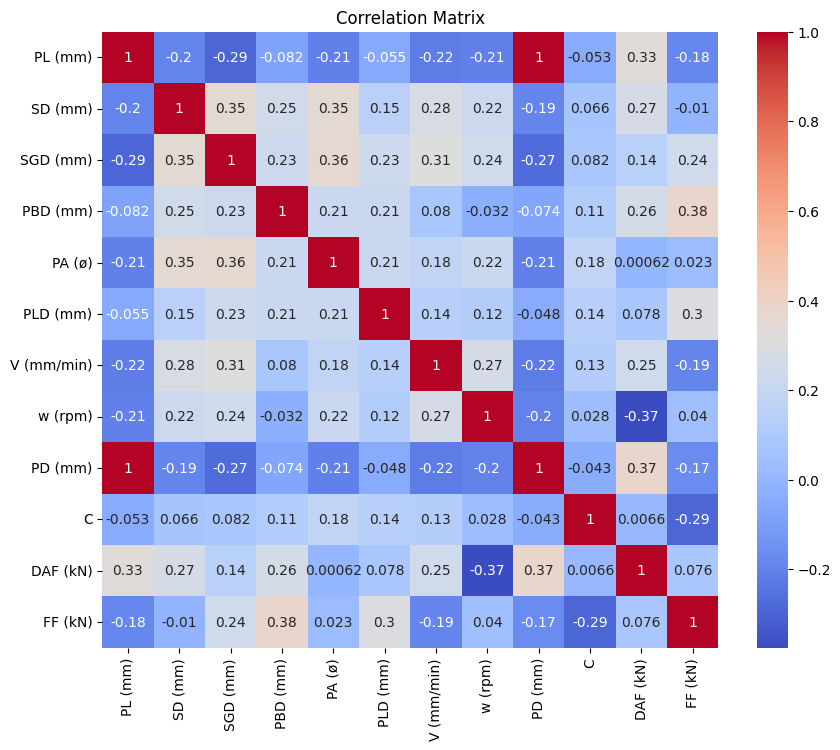

In [7]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

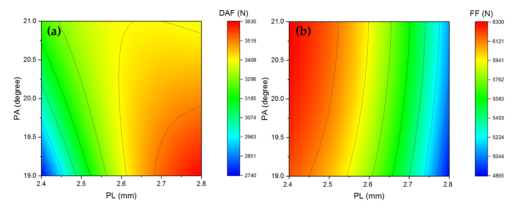

In [10]:
# Load the JPEG image
image3 = mpimg.imread(".\\data\\pic3.png")
image4 = mpimg.imread(".\\data\\pic4.png")
image5 = mpimg.imread(".\\data\\pic5.png")

# Display the image
plt.imshow(image3)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

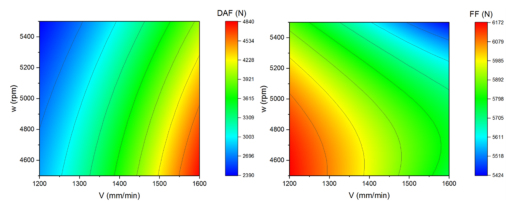

In [11]:
plt.imshow(image4)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

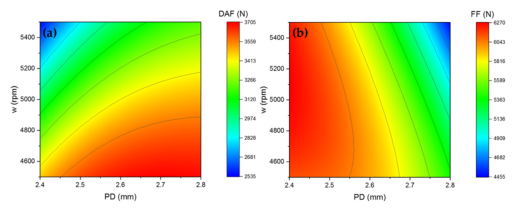

In [12]:
plt.imshow(image5)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Paper 4

In [11]:
df_fsw = pd.read_csv(".\\data\\paper4.csv")
df_eval = pd.read_csv(".\\data\\paper4_eval.csv")
df_fsw.head()

V (mm/min)  w (rpm)  PD (mm)  OL (mm)  DAF (N)  FF (N)
0        1300     3500     2.60     11.8     2930    7661
1        1300     4250     2.65     15.6     3630    7261
2        1300     5000     2.70     18.8     4040    6063
3        1600     3500     2.65     18.9     3950    7373
4        1600     4250     2.70     11.6     3860    6374

In [12]:
# Summary statistics
print(df_fsw.describe())

        V (mm/min)      w (rpm)    PD (mm)    OL (mm)      DAF (N)  \
count    13.000000    13.000000  13.000000  13.000000    13.000000   
mean   1700.000000  4292.307692   2.641692  15.969231  3691.538462   
std     326.598632   631.085755   0.044960   2.881951   524.973748   
min    1300.000000  3500.000000   2.560000  11.100000  2930.000000   
25%    1300.000000  3500.000000   2.600000  15.600000  3490.000000   
50%    1600.000000  4250.000000   2.650000  15.600000  3630.000000   
75%    2000.000000  5000.000000   2.677000  18.700000  3950.000000   
max    2100.000000  5000.000000   2.700000  18.900000  4700.000000   

            FF (N)  
count    13.000000  
mean   6493.692308  
std     868.884379  
min    4864.000000  
25%    5848.000000  
50%    6612.000000  
75%    7261.000000  
max    7661.000000  


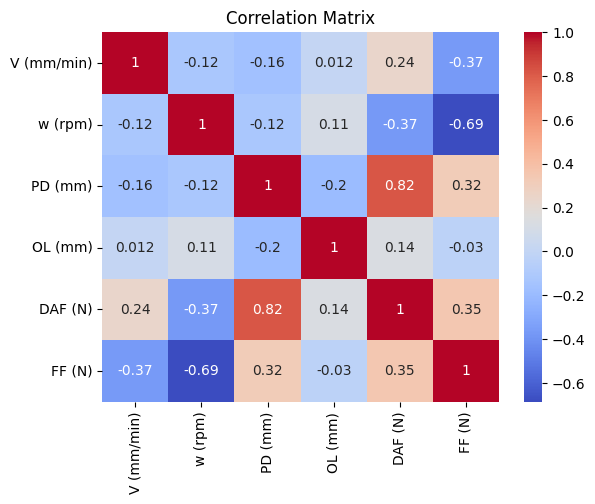

In [13]:
# Correlation matrix
correlation = df_fsw.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

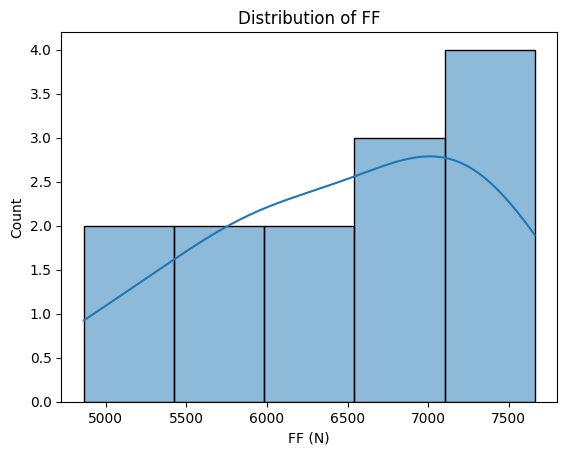

In [15]:
# Distribution of target feature (FF)
sns.histplot(df_fsw['FF (N)'], kde=True)
plt.xlabel('FF (N)')
plt.ylabel('Count')
plt.title('Distribution of FF')
plt.show()

In [16]:
# Correlation Analysis:
# Calculate the correlation coefficients between numerical variables to identify relationships and dependencies.

correlation = df_fsw.corr()
print(correlation)

            V (mm/min)   w (rpm)   PD (mm)   OL (mm)   DAF (N)    FF (N)
V (mm/min)    1.000000 -0.123315 -0.164012  0.011510  0.237671 -0.366897
w (rpm)      -0.123315  1.000000 -0.124619  0.110053 -0.373109 -0.685550
PD (mm)      -0.164012 -0.124619  1.000000 -0.195594  0.815991  0.315312
OL (mm)       0.011510  0.110053 -0.195594  1.000000  0.136963 -0.030288
DAF (N)       0.237671 -0.373109  0.815991  0.136963  1.000000  0.352934
FF (N)       -0.366897 -0.685550  0.315312 -0.030288  0.352934  1.000000


## Linear Regression

In [17]:
X = df_fsw.drop('FF (N)', axis=1)  # Features
y = df_fsw['FF (N)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 686918.0368433216
Mean Absolute Error (MAE): 700.0660122643652
R-squared: -8.1888560219826


In [19]:
# Make predictions on the test data using the trained model
pred_FF = model.predict(df_eval)

# Display the predicted UTS values
print(pred_FF)

[5801.50549704 5472.34853415 7597.71092257 7038.7475297 ]


In [20]:
real_FF = [6812, 7066, 7660, 7653]

In [21]:
real_FF = np.array([6812, 7066, 7660, 7653])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 985502.5403852705
Mean Absolute Error (MAE): 820.1718791336257
R-squared: -6.20543085841389


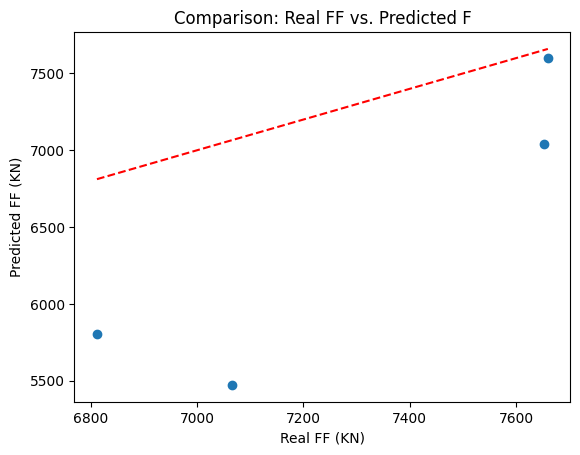

In [22]:
plt.scatter(real_FF, pred_FF)
plt.plot([min(real_FF), max(real_FF)], [min(real_FF), max(real_FF)], color='red', linestyle='--')
plt.xlabel('Real FF (KN)')
plt.ylabel('Predicted FF (KN)')
plt.title('Comparison: Real FF vs. Predicted F')
plt.show()

### ANN TensorFlow

In [1]:
df_fsw = pd.read_csv(".\\data\\paper4.csv")
df_eval = pd.read_csv(".\\data\\paper4_eval.csv")

In [2]:
X = df_fsw.drop('FF (N)', axis=1)  # Features
y = df_fsw['FF (N)']  # Target variable

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [3]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=3500, batch_size=32, verbose=1)


# Evaluate the model:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", loss)

Epoch 1/3500
1/1 [==============================] - 1s 626ms/step - loss: 41988900.0000
Epoch 2/3500
1/1 [==============================] - 0s 11ms/step - loss: 41988184.0000
Epoch 3/3500
1/1 [==============================] - 0s 23ms/step - loss: 41987472.0000
Epoch 4/3500
1/1 [==============================] - 0s 10ms/step - loss: 41986760.0000
Epoch 5/3500
1/1 [==============================] - 0s 4ms/step - loss: 41986048.0000
Epoch 6/3500
1/1 [==============================] - 0s 5ms/step - loss: 41985336.0000
Epoch 7/3500
1/1 [==============================] - 0s 4ms/step - loss: 41984624.0000
Epoch 8/3500
1/1 [==============================] - 0s 4ms/step - loss: 41983896.0000
Epoch 9/3500
1/1 [==============================] - 0s 4ms/step - loss: 41983156.0000
Epoch 10/3500
1/1 [==============================] - 0s 3ms/step - loss: 41982412.0000
Epoch 11/3500
1/1 [==============================] - 0s 4ms/step - loss: 41981652.0000
Epoch 12/3500
1/1 [============================

1/1 [==============================] - 0s 5ms/step - loss: 39730616.0000
Epoch 189/3500
1/1 [==============================] - 0s 4ms/step - loss: 39693172.0000
Epoch 190/3500
1/1 [==============================] - 0s 5ms/step - loss: 39655304.0000
Epoch 191/3500
1/1 [==============================] - 0s 5ms/step - loss: 39617016.0000
Epoch 192/3500
1/1 [==============================] - 0s 4ms/step - loss: 39578304.0000
Epoch 193/3500
1/1 [==============================] - 0s 4ms/step - loss: 39539176.0000
Epoch 194/3500
1/1 [==============================] - 0s 5ms/step - loss: 39499616.0000
Epoch 195/3500
1/1 [==============================] - 0s 4ms/step - loss: 39459640.0000
Epoch 196/3500
1/1 [==============================] - 0s 4ms/step - loss: 39419240.0000
Epoch 197/3500
1/1 [==============================] - 0s 4ms/step - loss: 39378408.0000
Epoch 198/3500
1/1 [==============================] - 0s 4ms/step - loss: 39337152.0000
Epoch 199/3500
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 25085220.0000
Epoch 375/3500
1/1 [==============================] - 0s 4ms/step - loss: 24971568.0000
Epoch 376/3500
1/1 [==============================] - 0s 4ms/step - loss: 24857734.0000
Epoch 377/3500
1/1 [==============================] - 0s 3ms/step - loss: 24743724.0000
Epoch 378/3500
1/1 [==============================] - 0s 3ms/step - loss: 24629546.0000
Epoch 379/3500
1/1 [==============================] - 0s 4ms/step - loss: 24515204.0000
Epoch 380/3500
1/1 [==============================] - 0s 4ms/step - loss: 24400700.0000
Epoch 381/3500
1/1 [==============================] - 0s 5ms/step - loss: 24286004.0000
Epoch 382/3500
1/1 [==============================] - 0s 4ms/step - loss: 24171128.0000
Epoch 383/3500
1/1 [==============================] - 0s 6ms/step - loss: 24056098.0000
Epoch 384/3500
1/1 [==============================] - 0s 3ms/step - loss: 23940918.0000
Epoch 385/3500
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 6160976.5000
Epoch 561/3500
1/1 [==============================] - 0s 5ms/step - loss: 6096634.5000
Epoch 562/3500
1/1 [==============================] - 0s 4ms/step - loss: 6032857.5000
Epoch 563/3500
1/1 [==============================] - 0s 4ms/step - loss: 5969643.0000
Epoch 564/3500
1/1 [==============================] - 0s 4ms/step - loss: 5906994.5000
Epoch 565/3500
1/1 [==============================] - 0s 3ms/step - loss: 5844907.0000
Epoch 566/3500
1/1 [==============================] - 0s 5ms/step - loss: 5783366.5000
Epoch 567/3500
1/1 [==============================] - 0s 3ms/step - loss: 5722352.0000
Epoch 568/3500
1/1 [==============================] - 0s 4ms/step - loss: 5661878.5000
Epoch 569/3500
1/1 [==============================] - 0s 5ms/step - loss: 5601949.5000
Epoch 570/3500
1/1 [==============================] - 0s 4ms/step - loss: 5542566.5000
Epoch 571/3500
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 1219660.0000
Epoch 749/3500
1/1 [==============================] - 0s 4ms/step - loss: 1214320.2500
Epoch 750/3500
1/1 [==============================] - 0s 6ms/step - loss: 1209079.0000
Epoch 751/3500
1/1 [==============================] - 0s 4ms/step - loss: 1203915.2500
Epoch 752/3500
1/1 [==============================] - 0s 3ms/step - loss: 1198819.6250
Epoch 753/3500
1/1 [==============================] - 0s 5ms/step - loss: 1193792.0000
Epoch 754/3500
1/1 [==============================] - 0s 3ms/step - loss: 1188827.1250
Epoch 755/3500
1/1 [==============================] - 0s 5ms/step - loss: 1183924.6250
Epoch 756/3500
1/1 [==============================] - 0s 4ms/step - loss: 1179082.5000
Epoch 757/3500
1/1 [==============================] - 0s 4ms/step - loss: 1174300.3750
Epoch 758/3500
1/1 [==============================] - 0s 4ms/step - loss: 1169576.1250
Epoch 759/3500
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 710582.3125
Epoch 938/3500
1/1 [==============================] - 0s 5ms/step - loss: 708832.0000
Epoch 939/3500
1/1 [==============================] - 0s 4ms/step - loss: 707084.0000
Epoch 940/3500
1/1 [==============================] - 0s 4ms/step - loss: 705349.0000
Epoch 941/3500
1/1 [==============================] - 0s 4ms/step - loss: 703616.8750
Epoch 942/3500
1/1 [==============================] - 0s 5ms/step - loss: 701888.3750
Epoch 943/3500
1/1 [==============================] - 0s 4ms/step - loss: 700171.3125
Epoch 944/3500
1/1 [==============================] - 0s 4ms/step - loss: 698478.7500
Epoch 945/3500
1/1 [==============================] - 0s 4ms/step - loss: 696787.1250
Epoch 946/3500
1/1 [==============================] - 0s 4ms/step - loss: 695096.9375
Epoch 947/3500
1/1 [==============================] - 0s 6ms/step - loss: 693408.6250
Epoch 948/3500
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 562860.8125
Epoch 1033/3500
1/1 [==============================] - 0s 4ms/step - loss: 561466.3125
Epoch 1034/3500
1/1 [==============================] - 0s 5ms/step - loss: 560074.9375
Epoch 1035/3500
1/1 [==============================] - 0s 4ms/step - loss: 558685.6250
Epoch 1036/3500
1/1 [==============================] - 0s 4ms/step - loss: 557301.3750
Epoch 1037/3500
1/1 [==============================] - 0s 4ms/step - loss: 555917.9375
Epoch 1038/3500
1/1 [==============================] - 0s 6ms/step - loss: 554539.3750
Epoch 1039/3500
1/1 [==============================] - 0s 4ms/step - loss: 553163.3125
Epoch 1040/3500
1/1 [==============================] - 0s 5ms/step - loss: 551790.1875
Epoch 1041/3500
1/1 [==============================] - 0s 4ms/step - loss: 550421.1875
Epoch 1042/3500
1/1 [==============================] - 0s 4ms/step - loss: 549052.6250
Epoch 1043/3500
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 361424.0000
Epoch 1221/3500
1/1 [==============================] - 0s 4ms/step - loss: 360612.1250
Epoch 1222/3500
1/1 [==============================] - 0s 4ms/step - loss: 359797.9375
Epoch 1223/3500
1/1 [==============================] - 0s 5ms/step - loss: 358987.0625
Epoch 1224/3500
1/1 [==============================] - 0s 3ms/step - loss: 358178.0312
Epoch 1225/3500
1/1 [==============================] - 0s 4ms/step - loss: 357390.7812
Epoch 1226/3500
1/1 [==============================] - 0s 5ms/step - loss: 356605.8125
Epoch 1227/3500
1/1 [==============================] - 0s 4ms/step - loss: 355821.1562
Epoch 1228/3500
1/1 [==============================] - 0s 4ms/step - loss: 355038.7500
Epoch 1229/3500
1/1 [==============================] - 0s 3ms/step - loss: 354257.0938
Epoch 1230/3500
1/1 [==============================] - 0s 4ms/step - loss: 353478.1250
Epoch 1231/3500
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 5ms/step - loss: 240659.1250
Epoch 1409/3500
1/1 [==============================] - 0s 4ms/step - loss: 240155.9688
Epoch 1410/3500
1/1 [==============================] - 0s 4ms/step - loss: 239653.7188
Epoch 1411/3500
1/1 [==============================] - 0s 6ms/step - loss: 239150.3281
Epoch 1412/3500
1/1 [==============================] - 0s 4ms/step - loss: 238644.8438
Epoch 1413/3500
1/1 [==============================] - 0s 5ms/step - loss: 238141.5781
Epoch 1414/3500
1/1 [==============================] - 0s 3ms/step - loss: 237637.5938
Epoch 1415/3500
1/1 [==============================] - 0s 4ms/step - loss: 237132.2812
Epoch 1416/3500
1/1 [==============================] - 0s 6ms/step - loss: 236623.4062
Epoch 1417/3500
1/1 [==============================] - 0s 4ms/step - loss: 236113.2031
Epoch 1418/3500
1/1 [==============================] - 0s 4ms/step - loss: 235605.0469
Epoch 1419/3500
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 4ms/step - loss: 154793.4844
Epoch 1597/3500
1/1 [==============================] - 0s 4ms/step - loss: 154435.2656
Epoch 1598/3500
1/1 [==============================] - 0s 4ms/step - loss: 154075.9688
Epoch 1599/3500
1/1 [==============================] - 0s 3ms/step - loss: 153721.4688
Epoch 1600/3500
1/1 [==============================] - 0s 3ms/step - loss: 153363.9062
Epoch 1601/3500
1/1 [==============================] - 0s 3ms/step - loss: 153007.5625
Epoch 1602/3500
1/1 [==============================] - 0s 3ms/step - loss: 152646.5938
Epoch 1603/3500
1/1 [==============================] - 0s 5ms/step - loss: 152295.3281
Epoch 1604/3500
1/1 [==============================] - 0s 3ms/step - loss: 151940.5312
Epoch 1605/3500
1/1 [==============================] - 0s 4ms/step - loss: 151584.6406
Epoch 1606/3500
1/1 [==============================] - 0s 5ms/step - loss: 151233.1562
Epoch 1607/3500
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 100934.9766
Epoch 1785/3500
1/1 [==============================] - 0s 3ms/step - loss: 100712.6484
Epoch 1786/3500
1/1 [==============================] - 0s 4ms/step - loss: 100490.9531
Epoch 1787/3500
1/1 [==============================] - 0s 4ms/step - loss: 100269.5703
Epoch 1788/3500
1/1 [==============================] - 0s 4ms/step - loss: 100050.0156
Epoch 1789/3500
1/1 [==============================] - 0s 5ms/step - loss: 99827.2188
Epoch 1790/3500
1/1 [==============================] - 0s 4ms/step - loss: 99607.4609
Epoch 1791/3500
1/1 [==============================] - 0s 4ms/step - loss: 99386.6406
Epoch 1792/3500
1/1 [==============================] - 0s 5ms/step - loss: 99166.2578
Epoch 1793/3500
1/1 [==============================] - 0s 4ms/step - loss: 98949.6250
Epoch 1794/3500
1/1 [==============================] - 0s 4ms/step - loss: 98731.7031
Epoch 1795/3500
1/1 [==============================] - 0s 4ms/ste

1/1 [==============================] - 0s 3ms/step - loss: 66880.8125
Epoch 1975/3500
1/1 [==============================] - 0s 6ms/step - loss: 66736.8203
Epoch 1976/3500
1/1 [==============================] - 0s 3ms/step - loss: 66592.9766
Epoch 1977/3500
1/1 [==============================] - 0s 3ms/step - loss: 66449.4844
Epoch 1978/3500
1/1 [==============================] - 0s 6ms/step - loss: 66307.7031
Epoch 1979/3500
1/1 [==============================] - 0s 4ms/step - loss: 66166.8281
Epoch 1980/3500
1/1 [==============================] - 0s 5ms/step - loss: 66024.4141
Epoch 1981/3500
1/1 [==============================] - 0s 4ms/step - loss: 65882.1016
Epoch 1982/3500
1/1 [==============================] - 0s 4ms/step - loss: 65740.1953
Epoch 1983/3500
1/1 [==============================] - 0s 5ms/step - loss: 65598.4688
Epoch 1984/3500
1/1 [==============================] - 0s 3ms/step - loss: 65457.2891
Epoch 1985/3500
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 44511.9922
Epoch 2165/3500
1/1 [==============================] - 0s 4ms/step - loss: 44412.2930
Epoch 2166/3500
1/1 [==============================] - 0s 4ms/step - loss: 44315.6406
Epoch 2167/3500
1/1 [==============================] - 0s 3ms/step - loss: 44219.0234
Epoch 2168/3500
1/1 [==============================] - 0s 3ms/step - loss: 44121.6992
Epoch 2169/3500
1/1 [==============================] - 0s 5ms/step - loss: 44025.6836
Epoch 2170/3500
1/1 [==============================] - 0s 5ms/step - loss: 43927.6875
Epoch 2171/3500
1/1 [==============================] - 0s 4ms/step - loss: 43831.5820
Epoch 2172/3500
1/1 [==============================] - 0s 4ms/step - loss: 43735.2930
Epoch 2173/3500
1/1 [==============================] - 0s 4ms/step - loss: 43638.4961
Epoch 2174/3500
1/1 [==============================] - 0s 5ms/step - loss: 43544.0820
Epoch 2175/3500
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 28878.9648
Epoch 2355/3500
1/1 [==============================] - 0s 4ms/step - loss: 28812.0156
Epoch 2356/3500
1/1 [==============================] - 0s 5ms/step - loss: 28743.9492
Epoch 2357/3500
1/1 [==============================] - 0s 4ms/step - loss: 28675.2129
Epoch 2358/3500
1/1 [==============================] - 0s 4ms/step - loss: 28608.6777
Epoch 2359/3500
1/1 [==============================] - 0s 4ms/step - loss: 28541.9570
Epoch 2360/3500
1/1 [==============================] - 0s 5ms/step - loss: 28473.7598
Epoch 2361/3500
1/1 [==============================] - 0s 5ms/step - loss: 28405.7461
Epoch 2362/3500
1/1 [==============================] - 0s 3ms/step - loss: 28338.2383
Epoch 2363/3500
1/1 [==============================] - 0s 5ms/step - loss: 28272.9062
Epoch 2364/3500
1/1 [==============================] - 0s 3ms/step - loss: 28205.2148
Epoch 2365/3500
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 17508.6797
Epoch 2545/3500
1/1 [==============================] - 0s 4ms/step - loss: 17455.4863
Epoch 2546/3500
1/1 [==============================] - 0s 4ms/step - loss: 17400.5000
Epoch 2547/3500
1/1 [==============================] - 0s 3ms/step - loss: 17348.5410
Epoch 2548/3500
1/1 [==============================] - 0s 5ms/step - loss: 17295.3496
Epoch 2549/3500
1/1 [==============================] - 0s 6ms/step - loss: 17243.6992
Epoch 2550/3500
1/1 [==============================] - 0s 4ms/step - loss: 17189.6465
Epoch 2551/3500
1/1 [==============================] - 0s 4ms/step - loss: 17135.9199
Epoch 2552/3500
1/1 [==============================] - 0s 3ms/step - loss: 17088.0742
Epoch 2553/3500
1/1 [==============================] - 0s 5ms/step - loss: 17037.0898
Epoch 2554/3500
1/1 [==============================] - 0s 4ms/step - loss: 16984.9180
Epoch 2555/3500
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 9381.2285
Epoch 2735/3500
1/1 [==============================] - 0s 4ms/step - loss: 9348.1289
Epoch 2736/3500
1/1 [==============================] - 0s 5ms/step - loss: 9314.6201
Epoch 2737/3500
1/1 [==============================] - 0s 3ms/step - loss: 9281.8066
Epoch 2738/3500
1/1 [==============================] - 0s 5ms/step - loss: 9248.7393
Epoch 2739/3500
1/1 [==============================] - 0s 4ms/step - loss: 9214.6621
Epoch 2740/3500
1/1 [==============================] - 0s 3ms/step - loss: 9183.7891
Epoch 2741/3500
1/1 [==============================] - 0s 5ms/step - loss: 9151.8340
Epoch 2742/3500
1/1 [==============================] - 0s 3ms/step - loss: 9118.1113
Epoch 2743/3500
1/1 [==============================] - 0s 5ms/step - loss: 9084.6816
Epoch 2744/3500
1/1 [==============================] - 0s 4ms/step - loss: 9052.6006
Epoch 2745/3500
1/1 [==============================] - 0s 3ms/step - loss: 9019.6

1/1 [==============================] - 0s 4ms/step - loss: 4519.4111
Epoch 2927/3500
1/1 [==============================] - 0s 4ms/step - loss: 4502.2041
Epoch 2928/3500
1/1 [==============================] - 0s 4ms/step - loss: 4484.8760
Epoch 2929/3500
1/1 [==============================] - 0s 4ms/step - loss: 4465.6709
Epoch 2930/3500
1/1 [==============================] - 0s 4ms/step - loss: 4446.9941
Epoch 2931/3500
1/1 [==============================] - 0s 4ms/step - loss: 4429.4277
Epoch 2932/3500
1/1 [==============================] - 0s 4ms/step - loss: 4411.4648
Epoch 2933/3500
1/1 [==============================] - 0s 4ms/step - loss: 4392.5835
Epoch 2934/3500
1/1 [==============================] - 0s 6ms/step - loss: 4375.1313
Epoch 2935/3500
1/1 [==============================] - 0s 5ms/step - loss: 4357.2104
Epoch 2936/3500
1/1 [==============================] - 0s 5ms/step - loss: 4338.7891
Epoch 2937/3500
1/1 [==============================] - 0s 4ms/step - loss: 4320.6

1/1 [==============================] - 0s 4ms/step - loss: 1853.0885
Epoch 3119/3500
1/1 [==============================] - 0s 4ms/step - loss: 1842.6628
Epoch 3120/3500
1/1 [==============================] - 0s 5ms/step - loss: 1832.0201
Epoch 3121/3500
1/1 [==============================] - 0s 4ms/step - loss: 1822.2493
Epoch 3122/3500
1/1 [==============================] - 0s 4ms/step - loss: 1812.5403
Epoch 3123/3500
1/1 [==============================] - 0s 5ms/step - loss: 1802.2454
Epoch 3124/3500
1/1 [==============================] - 0s 3ms/step - loss: 1791.4192
Epoch 3125/3500
1/1 [==============================] - 0s 5ms/step - loss: 1781.9037
Epoch 3126/3500
1/1 [==============================] - 0s 4ms/step - loss: 1772.3821
Epoch 3127/3500
1/1 [==============================] - 0s 3ms/step - loss: 1762.1208
Epoch 3128/3500
1/1 [==============================] - 0s 3ms/step - loss: 1752.2253
Epoch 3129/3500
1/1 [==============================] - 0s 4ms/step - loss: 1742.8

1/1 [==============================] - 0s 5ms/step - loss: 534.0336
Epoch 3312/3500
1/1 [==============================] - 0s 3ms/step - loss: 530.0264
Epoch 3313/3500
1/1 [==============================] - 0s 5ms/step - loss: 526.0773
Epoch 3314/3500
1/1 [==============================] - 0s 4ms/step - loss: 522.1935
Epoch 3315/3500
1/1 [==============================] - 0s 4ms/step - loss: 518.3504
Epoch 3316/3500
1/1 [==============================] - 0s 4ms/step - loss: 514.4719
Epoch 3317/3500
1/1 [==============================] - 0s 4ms/step - loss: 510.7890
Epoch 3318/3500
1/1 [==============================] - 0s 4ms/step - loss: 507.0872
Epoch 3319/3500
1/1 [==============================] - 0s 5ms/step - loss: 503.4590
Epoch 3320/3500
1/1 [==============================] - 0s 4ms/step - loss: 499.4477
Epoch 3321/3500
1/1 [==============================] - 0s 4ms/step - loss: 496.0258
Epoch 3322/3500
1/1 [==============================] - 0s 5ms/step - loss: 492.4823
Epoch 33

In [4]:
# Scale the features of df_test using the same scaler used for training data
df_eval_scaled = scaler.transform(df_eval.values)

# Make predictions on the scaled test data using the trained model
pred_FF = model.predict(df_eval_scaled)

# Display the predicted UTS values
print(pred_FF)

C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
[[4560.231]
 [5199.442]
 [7972.367]
 [5827.817]]


In [5]:
real_FF = np.array([2709, 4746, 2123, 3982])  

# Calculate evaluation metrics
mse = mean_squared_error(real_FF, pred_FF)
mae = mean_absolute_error(real_FF, pred_FF)
r2 = r2_score(real_FF, pred_FF)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 10313700.527581394
Mean Absolute Error (MAE): 2499.9642333984375
R-squared: -8.688205744220179


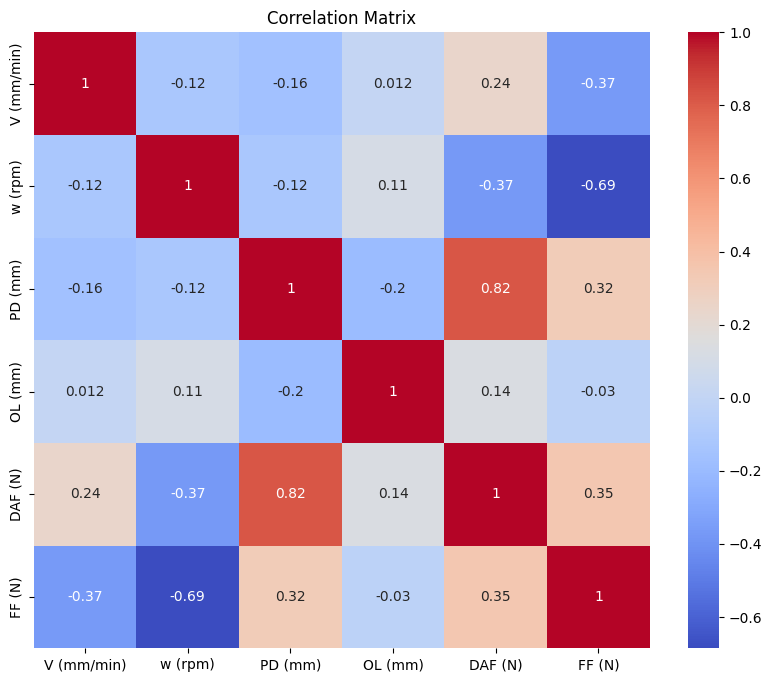

In [6]:
# Compute the correlation matrix
corr_matrix = df_fsw.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

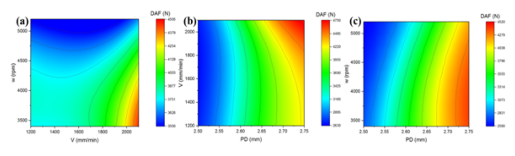

In [13]:
# Load the JPEG image
image6 = mpimg.imread(".\\data\\pic6.png")
image7 = mpimg.imread(".\\data\\pic7.png")
image8 = mpimg.imread(".\\data\\pic8.png")
image9 = mpimg.imread(".\\data\\pic9.png")
image10 = mpimg.imread(".\\data\\pic10.png")

# Display the image
plt.imshow(image6)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

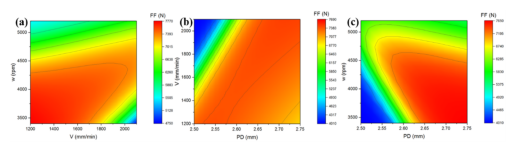

In [14]:
plt.imshow(image7)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

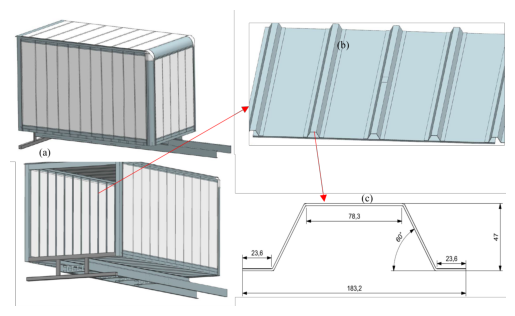

In [15]:
plt.imshow(image8)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

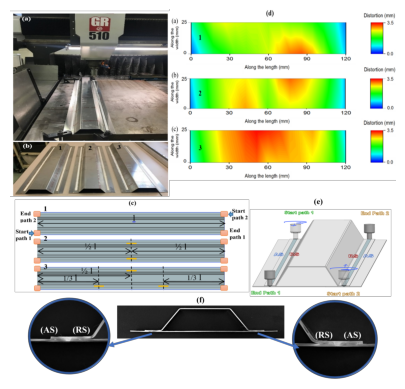

In [16]:
plt.imshow(image9)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

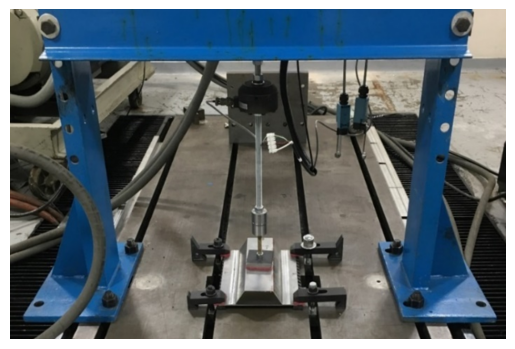

In [17]:
plt.imshow(image10)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()